In [1]:
#Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import xgboost as xgb
from PIL import Image, ImageOps
from PIL import ImageOps

In [3]:
df = pd.read_csv("NCAA Champion RawData.csv")
df.head(2)

,Season,#,Team/Season,Team,Team ID,Team ID/Season,Conference,Conference/Season,Bracket Region,Bracket Region/Season,...,top_12_week 6,top_8_team_rating,t6(adjem)_t8(tr)_t12(wk6),sum school cs,historical_school_rating,team_rating_avg_custom_2,team_rating_avg_custom,max_player_rating_custom,cf_rating_custom,bracket_region_rating_custom
0,2023,40,Connecticut 2023,Connecticut,321,321 2023,Big East,Big East 2023,west,west 2023,...,1,1,1,4.833333,12.25,87.791667,66.791667,62.850000,30.374174,36.742277
1,2023,34,San Diego State 2023,San Diego State,257,257 2023,MWC,MWC 2023,south,south 2023,...,0,0,0,1.000000,0.00,30.102778,30.102778,39.969444,23.963883,34.822648


In [4]:
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'sum coach mmt gp', 'sum coach sea coa', 'AdjTempo', 'AdjOE', 'AdjDE', 'AdjEM', 'AdjTempo Rk', 'AdjOE Rk', 'AdjDE Rk', 'AdjEM Rk', 'Top 6 AdjEM Rk', 'round make', 'champion share', 'make tournament', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'Top_4_Seed_True', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L3Y cs', 'sum school L5Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school Finals apps', 'sum school F4 apps', 'sum school E8 apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's"

In [5]:
df = pd.read_csv("NCAA Champion RawData.csv")

exclude_columns = ['Season', '#', 'Team/Season', 'Team','Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'round make', 'champion share', 
                   'make tournament', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'Top_4_Seed_True','AdjOE Rk', 'AdjDE Rk', 'AdjEM Rk', 'Top 6 AdjEM Rk', 'top_12_week 6 ', 'top_8_team_rating', 't6(adjem)_t8(tr)_t12(wk6)']

reverse_rank_columns = ['DRtg','AdjDE']

for col in df.columns:
    if col not in exclude_columns:
        if col in reverse_rank_columns:
            df[col] = df.groupby('Season')[col].rank(method='min', ascending=True)
        else:
            df[col] = df.groupby('Season')[col].rank(method='min', ascending=False)

df.to_csv("NCAA Champion LR Data.csv", index=False)

print("NCAA Champion LR Data.csv'")

NCAA Champion LR Data.csv'


In [2]:
df = pd.read_csv("NCAA Champion LR Data.csv")
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'sum coach mmt gp', 'sum coach sea coa', 'AdjTempo', 'AdjOE', 'AdjDE', 'AdjEM', 'AdjTempo Rk', 'AdjOE Rk', 'AdjDE Rk', 'AdjEM Rk', 'Top 6 AdjEM Rk', 'round make', 'champion share', 'make tournament', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'Top_4_Seed_True', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L3Y cs', 'sum school L5Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school Finals apps', 'sum school F4 apps', 'sum school E8 apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's"

In [7]:
df

,Season,#,Team/Season,Team,Team ID,Team ID/Season,Conference,Conference/Season,Bracket Region,Bracket Region/Season,...,top_12_week 6,top_8_team_rating,t6(adjem)_t8(tr)_t12(wk6),sum school cs,historical_school_rating,team_rating_avg_custom_2,team_rating_avg_custom,max_player_rating_custom,cf_rating_custom,bracket_region_rating_custom
0,2023,40,Connecticut 2023,Connecticut,321,321 2023,Big East,Big East 2023,west,west 2023,...,1,1,1,6.0,2.0,1.0,2.0,8.0,8.0,1.0
1,2023,34,San Diego State 2023,San Diego State,257,257 2023,MWC,MWC 2023,south,south 2023,...,0,0,0,33.0,29.0,42.0,42.0,51.0,41.0,33.0
2,2023,46,Miami (FL) 2023,Miami (FL),169,169 2023,ACC,ACC 2023,midwest,midwest 2023,...,0,0,0,27.0,22.0,17.0,15.0,18.0,28.0,17.0
3,2023,17,Florida Atlantic 2023,Florida Atlantic,87,87 2023,C-USA,C-USA 2023,east,east 2023,...,0,0,0,44.0,29.0,32.0,32.0,35.0,47.0,49.0
4,2023,97,Texas 2023,Texas,297,297 2023,Big 12,Big 12 2023,midwest,midwest 2023,...,1,0,0,13.0,12.0,13.0,10.0,12.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275,2003,48,Utah State 2003,Utah State,332,332 2003,Big West,Big West 2003,west,west 2003,...,0,0,0,1.0,1.0,45.0,45.0,58.0,59.0,1.0
1276,2003,43,South Carolina State 2003,South Carolina State,267,267 2003,MEAC,MEAC 2003,east,east 2003,...,0,0,0,1.0,1.0,63.0,63.0,63.0,64.0,49.0
1277,2003,37,IUPUI 2003,IUPUI,128,128 2003,Summit,Summit 2003,midwest,midwest 2003,...,0,0,0,1.0,1.0,52.0,52.0,54.0,54.0,17.0
1278,2003,73,Vermont 2003,Vermont,339,339 2003,AM East,AM East 2003,west,west 2003,...,0,0,0,1.0,1.0,38.0,38.0,30.0,57.0,1.0


In [73]:
#df.drop(df[df['Season'] < 2005].index, inplace = True)
#df

In [10]:
data_columns = ['sum coach mmt gp', 'sum coach sea coa', 'AdjTempo', 'AdjOE', 'AdjDE', 'AdjEM', 'Top 6 AdjEM Rk', 'champion share', 
               'Seed_Tournament', 
                'Top_4_Seed_True', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs',
                'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L3Y cs',
                'sum school L5Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 
                'sum school Finals apps', 'sum school F4 apps', 'sum school E8 apps', 'TS%', 'eFG%',
                'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40',
                'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', 
                '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO',
                'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', 
                '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 
                'PF', 'sum mm tour games', 'sum cf tour games', 'sum cf reg games', 'sum career games',
                'sum polls made', 'poll_Pre 1', 'poll_Week 2', 'poll_Week 3', 'poll_Week 4', 'poll_Week 5',
                'poll_Week 6', 'poll_Week 7', 'poll_Week 8', 'poll_Week 9', 'poll_Week 10', 
                'poll_Week 11', 'poll_Week 12', 'poll_Week 13', 'poll_Week 14', 'poll_Week 15',
                'poll_Week 16', 'poll_Week 17', 'poll_Week 18', 'poll_avg', 'top_12_week 6 ', 
                'top_8_team_rating', 't6(adjem)_t8(tr)_t12(wk6)', 'sum school cs', 'historical_school_rating', 
                'team_rating_avg_custom_2', 'team_rating_avg_custom', 'max_player_rating_custom', 'cf_rating_custom',
                'bracket_region_rating_custom']

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

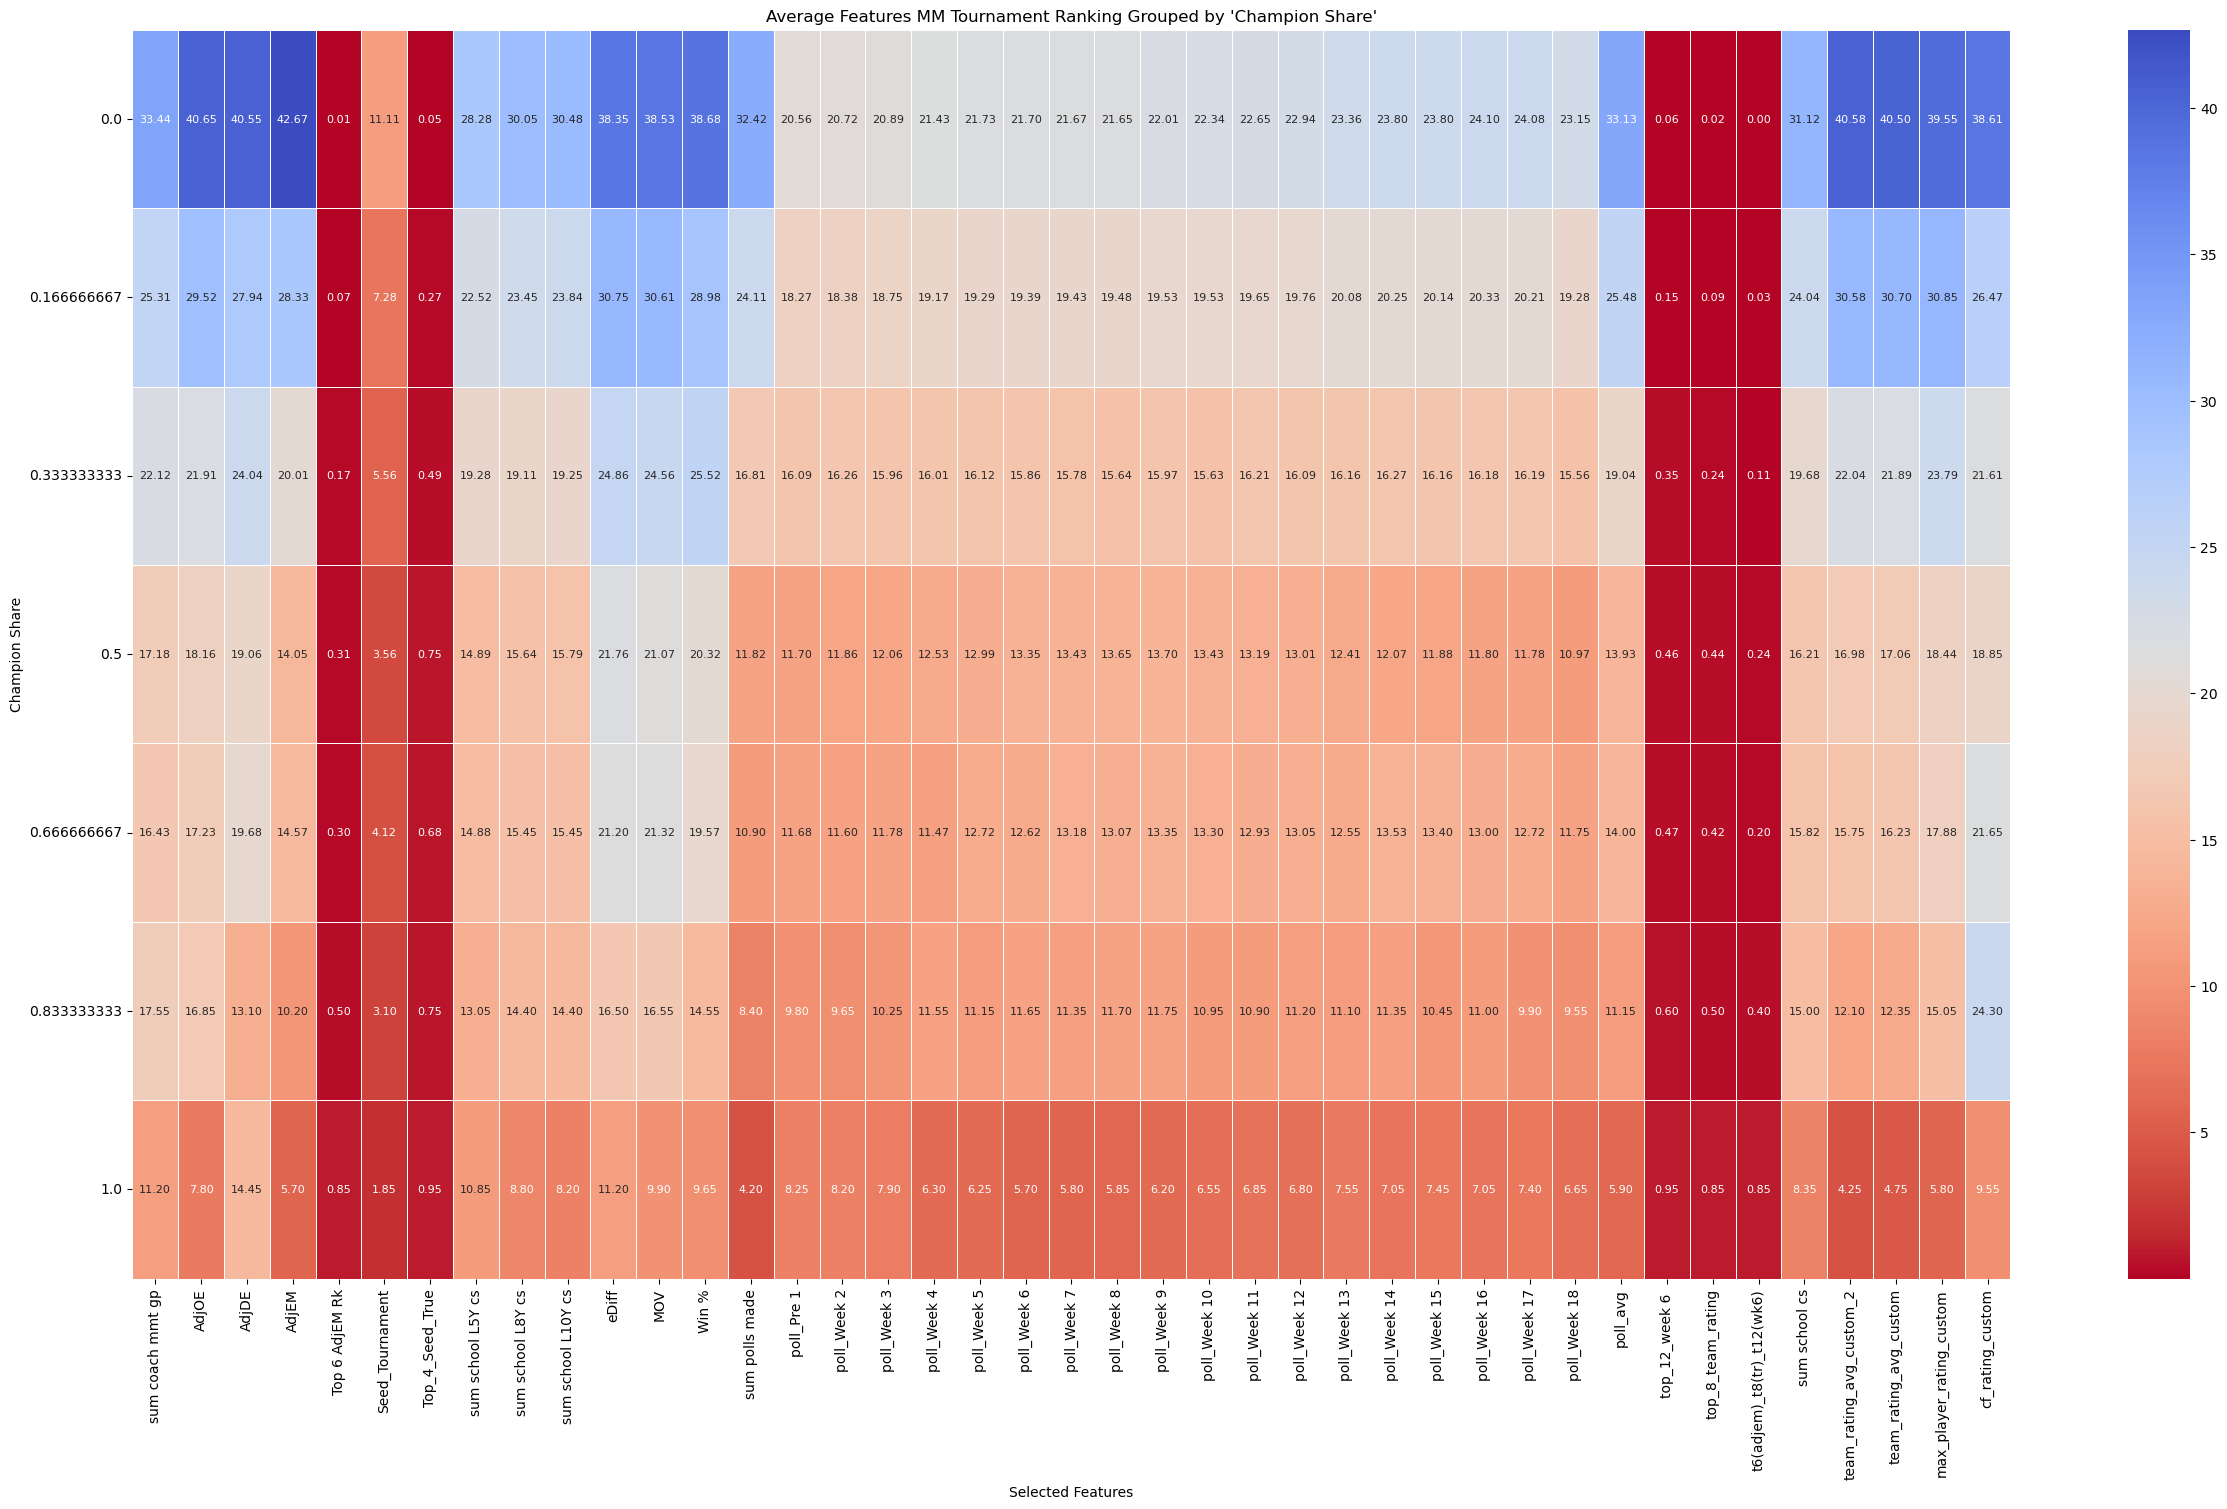

In [11]:
corr = data.corr().abs()
selected_features = corr.loc[corr['champion share']>.35].index

corr_df = data[selected_features].groupby('champion share').mean()

plt.rcParams['figure.figsize'] = (25, 15)
plt.title("Average Features MM Tournament Ranking Grouped by 'Champion Share'")
sns.heatmap(data=corr_df, cmap='coolwarm_r', annot=True, linewidth=.5, annot_kws={"size": 8}, fmt=".2f")

plt.xticks(rotation=90)  
plt.yticks(rotation=0)   

plt.tight_layout()  

plt.xlabel("Selected Features")
plt.ylabel("Champion Share")
plt.savefig("avg_fea_ht.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("avg_fea_ht.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("avg_fea_ht.png")
plt.show()

In [12]:
# Calculate correlation with 'champion share'
correlation_with_champion_share = df[data_columns].corrwith(df['champion share'])

# Create a DataFrame to store correlation values and sort by absolute value
correlation_df = pd.DataFrame(correlation_with_champion_share, columns=['Correlation'])
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Display sorted correlation values
for feature, corr, abs_corr in zip(correlation_df.index, correlation_df['Correlation'], correlation_df['Abs_Correlation']):
    print(f"Feature: {feature}, Correlation: {corr}, Absolute Correlation: {abs_corr}")

Feature: champion share, Correlation: 1.0, Absolute Correlation: 1.0
Feature: poll_Week 17, Correlation: -0.5766833572310319, Absolute Correlation: 0.5766833572310319
Feature: Seed_Tournament, Correlation: -0.5760561945632783, Absolute Correlation: 0.5760561945632783
Feature: poll_avg, Correlation: -0.5744747267420449, Absolute Correlation: 0.5744747267420449
Feature: AdjEM, Correlation: -0.5702674071874047, Absolute Correlation: 0.5702674071874047
Feature: poll_Week 16, Correlation: -0.5666860697178838, Absolute Correlation: 0.5666860697178838
Feature: poll_Week 15, Correlation: -0.5566763572203903, Absolute Correlation: 0.5566763572203903
Feature: sum polls made, Correlation: -0.5555510272496266, Absolute Correlation: 0.5555510272496266
Feature: poll_Week 14, Correlation: -0.5475982507741596, Absolute Correlation: 0.5475982507741596
Feature: Top_4_Seed_True, Correlation: 0.5451487116340329, Absolute Correlation: 0.5451487116340329
Feature: poll_Week 13, Correlation: -0.54174022569092

In [40]:
print("Seed")

champions_df = df[df['champion share'] == 1.00]
unique_ranks = champions_df['Seed_Tournament'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['Seed_Tournament'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions seed {rank}: {percentage:.2f}%")

Seed
The percentage of champions seed Rank 1: 65.00%
The percentage of champions seed Rank 3: 15.00%
The percentage of champions seed Rank 2: 10.00%
The percentage of champions seed Rank 4: 5.00%
The percentage of champions seed Rank 7: 5.00%


Average Champion Share by Seed Tournament | Since 2003
Seed_Tournament
1     0.533333
2     0.375000
3     0.335417
4     0.256250
5     0.197917
7     0.166667
6     0.137500
11    0.127083
8     0.122917
9     0.106292
10    0.091667
12    0.085417
13    0.041667
15    0.025000
14    0.018750
16    0.004167
Name: champion share, dtype: float64


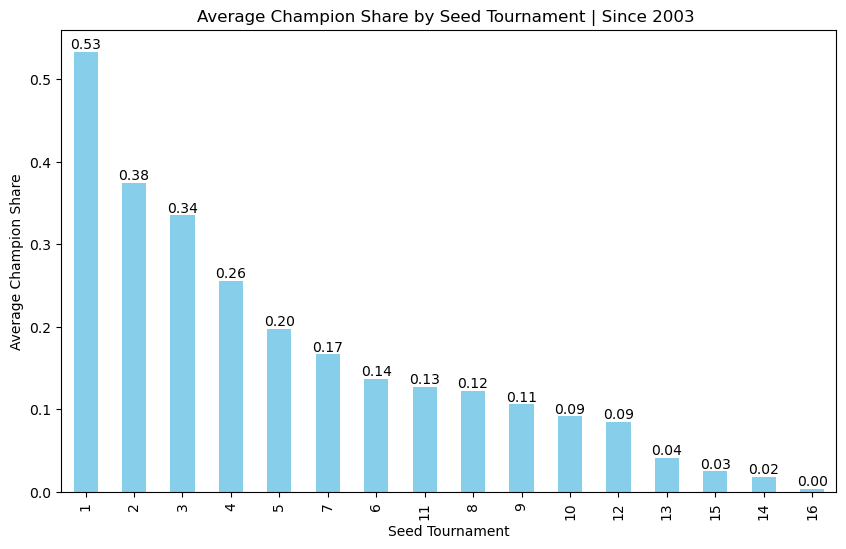

Max Champion Share by Seed Tournament | Since 2003
Seed_Tournament
1     1.000000
2     1.000000
3     1.000000
4     1.000000
7     1.000000
5     0.833333
8     0.833333
9     0.666667
10    0.666667
11    0.666667
6     0.500000
12    0.500000
15    0.500000
13    0.333333
14    0.166667
16    0.166667
Name: champion share, dtype: float64


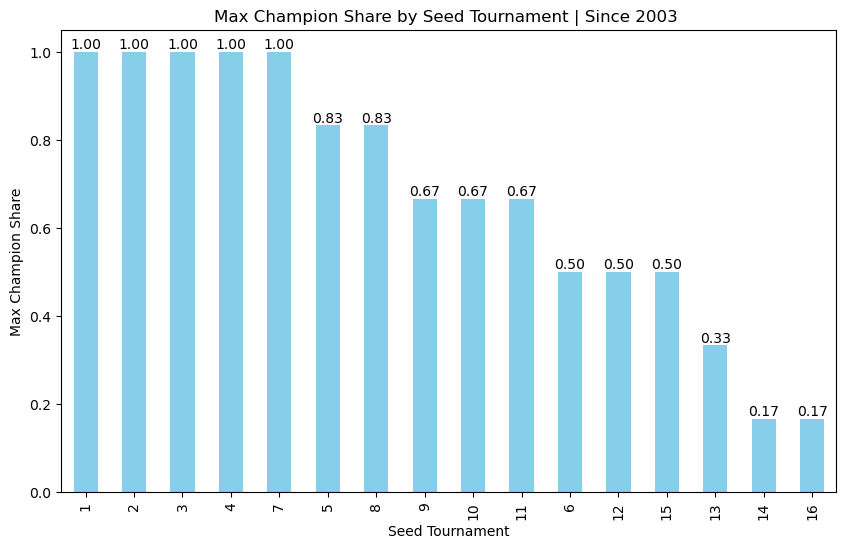

In [6]:
avg_champion_share = df.groupby('Seed_Tournament')['champion share'].mean()
avg_champion_share_sorted = avg_champion_share.sort_values(ascending=False)

print("Average Champion Share by Seed Tournament | Since 2003")
print(avg_champion_share_sorted)

fig, ax = plt.subplots(figsize=(10, 6))

ax = avg_champion_share_sorted.plot(kind='bar', color='skyblue')
plt.title('Average Champion Share by Seed Tournament | Since 2003 ')
plt.xlabel('Seed Tournament')
plt.ylabel('Average Champion Share')

for i, v in enumerate(avg_champion_share_sorted):
    ax.text(i, v - 0.0,f'{v:.2f}', ha='center', va='bottom')

plt.savefig("avg_cs_seed.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("avg_cs_seed.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("avg_cs_seed.png")    
    
plt.show()    

#=========================================================================================================================

max_champion_share = df.groupby('Seed_Tournament')['champion share'].max()
max_champion_share_sorted = max_champion_share.sort_values(ascending=False)

print("Max Champion Share by Seed Tournament | Since 2003")
print(max_champion_share_sorted)

fig, ax = plt.subplots(figsize=(10, 6))

ax = max_champion_share_sorted.plot(kind='bar', color='skyblue')
plt.title('Max Champion Share by Seed Tournament | Since 2003 ')
plt.xlabel('Seed Tournament')
plt.ylabel('Max Champion Share')

for i, v in enumerate(max_champion_share_sorted):
    ax.text(i, v - 0.0,f'{v:.2f}', ha='center', va='bottom')
    
plt.savefig("max_cs_seed.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("max_cs_seed.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("max_cs_seed.png")   

plt.show()

In [4]:
filtered_df = df[df['champion share'] >= 0.0]

avg_seed_tournament = filtered_df['Seed_Tournament'].mean()
min_seed_tournament = filtered_df['Seed_Tournament'].min()
max_seed_tournament = filtered_df['Seed_Tournament'].max()
print("AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.00 (Round of 64):", avg_seed_tournament, min_seed_tournament, max_seed_tournament)

filtered_df = df[df['champion share'] >= 0.16]

avg_seed_tournament = filtered_df['Seed_Tournament'].mean()
min_seed_tournament = filtered_df['Seed_Tournament'].min()
max_seed_tournament = filtered_df['Seed_Tournament'].max()
print("AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.16 (Round of 32):", avg_seed_tournament, min_seed_tournament, max_seed_tournament)

filtered_df = df[df['champion share'] >= 0.30]

avg_seed_tournament = filtered_df['Seed_Tournament'].mean()
min_seed_tournament = filtered_df['Seed_Tournament'].min()
max_seed_tournament = filtered_df['Seed_Tournament'].max()
print("AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.30 (Sweet Sixteen):", avg_seed_tournament, min_seed_tournament, max_seed_tournament)

filtered_df = df[df['champion share'] >= 0.50]

avg_seed_tournament = filtered_df['Seed_Tournament'].mean()
min_seed_tournament = filtered_df['Seed_Tournament'].min()
max_seed_tournament = filtered_df['Seed_Tournament'].max()
print("AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.50 (Elite Eight):", avg_seed_tournament, min_seed_tournament, max_seed_tournament)

filtered_df = df[df['champion share'] >= 0.66]

avg_seed_tournament = filtered_df['Seed_Tournament'].mean()
min_seed_tournament = filtered_df['Seed_Tournament'].min()
max_seed_tournament = filtered_df['Seed_Tournament'].max()
print("AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.66 (Final Four):", avg_seed_tournament, min_seed_tournament, max_seed_tournament)


filtered_df = df[df['champion share'] >= 0.83]

avg_seed_tournament = filtered_df['Seed_Tournament'].mean()
min_seed_tournament = filtered_df['Seed_Tournament'].min()
max_seed_tournament = filtered_df['Seed_Tournament'].max()
print("AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.83 (Finals):", avg_seed_tournament, min_seed_tournament, max_seed_tournament)

filtered_df = df[df['champion share'] == 1]

avg_seed_tournament = filtered_df['Seed_Tournament'].mean()
min_seed_tournament = filtered_df['Seed_Tournament'].min()
max_seed_tournament = filtered_df['Seed_Tournament'].max()
print("AVG, MIN, MAX | Tournament Seed | Champion Share == 1 (Win Championship):", avg_seed_tournament, min_seed_tournament, max_seed_tournament)

AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.00 (Round of 64): 8.5 1 16
AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.16 (Round of 32): 5.8859375 1 16
AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.30 (Sweet Sixteen): 4.49375 1 15
AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.50 (Elite Eight): 3.43125 1 15
AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.66 (Final Four): 3.3 1 11
AVG, MIN, MAX | Tournament Seed | Champion Share >= 0.83 (Finals): 2.475 1 8
AVG, MIN, MAX | Tournament Seed | Champion Share == 1 (Win Championship): 1.85 1 7


In [5]:
print("============================= Round of 32 Advance % =====================================\n")

for seed in range(1, 17):
    total_seeds = df[df['Seed_Tournament'] == seed] 
    qualified_seeds = total_seeds[total_seeds['champion share'] >= 0.16]  

    count_qualified_seeds = len(qualified_seeds)
    total_seeds_count = len(total_seeds)

    percentage_qualified_seeds = (count_qualified_seeds / total_seeds_count) * 100

    print(f"Percentage of {seed} seeds with champion share >= 0.16: {percentage_qualified_seeds}%")

print("\n")
print("============================= Sweet Sixteen Advance % =====================================\n")

for seed in range(1, 17):
    total_seeds = df[df['Seed_Tournament'] == seed]  
    qualified_seeds = total_seeds[total_seeds['champion share'] >= 0.3]  

    count_qualified_seeds = len(qualified_seeds)
    total_seeds_count = len(total_seeds)

    percentage_qualified_seeds = (count_qualified_seeds / total_seeds_count) * 100

    print(f"Percentage of {seed} seeds with champion share >= 0.3: {percentage_qualified_seeds}%")
    
print("\n")
print("============================= Elite Eight Advance % =====================================\n")

for seed in range(1, 17):
    total_seeds = df[df['Seed_Tournament'] == seed]  
    qualified_seeds = total_seeds[total_seeds['champion share'] >= 0.5]  

    count_qualified_seeds = len(qualified_seeds)
    total_seeds_count = len(total_seeds)

    percentage_qualified_seeds = (count_qualified_seeds / total_seeds_count) * 100

    print(f"Percentage of {seed} seeds with champion share >= 0.5: {percentage_qualified_seeds}%")
    
print("\n")
print("============================= Final Four Advance % =====================================\n")

for seed in range(1, 17):
    total_seeds = df[df['Seed_Tournament'] == seed]  
    qualified_seeds = total_seeds[total_seeds['champion share'] >= 0.6]  

    count_qualified_seeds = len(qualified_seeds)
    total_seeds_count = len(total_seeds)

    percentage_qualified_seeds = (count_qualified_seeds / total_seeds_count) * 100

    print(f"Percentage of {seed} seeds with champion share >= 0.6: {percentage_qualified_seeds}%")
    
print("\n")
print("============================= Finals Advance % =====================================\n")

for seed in range(1, 17):
    total_seeds = df[df['Seed_Tournament'] == seed]  
    qualified_seeds = total_seeds[total_seeds['champion share'] >= 0.8]  

    count_qualified_seeds = len(qualified_seeds)
    total_seeds_count = len(total_seeds)

    percentage_qualified_seeds = (count_qualified_seeds / total_seeds_count) * 100

    print(f"Percentage of {seed} seeds with champion share >= 0.8: {percentage_qualified_seeds}%")
    
print("\n")
print("============================= Champion Advance % =====================================\n")

for seed in range(1, 17):
    total_seeds = df[df['Seed_Tournament'] == seed]  
    qualified_seeds = total_seeds[total_seeds['champion share'] == 1]  

    count_qualified_seeds = len(qualified_seeds)
    total_seeds_count = len(total_seeds)

    percentage_qualified_seeds = (count_qualified_seeds / total_seeds_count) * 100

    print(f"Percentage of {seed} seeds with champion share == 1: {percentage_qualified_seeds}%")
    


============================= Round of 32 Advance % =====================================

Percentage of 1 seeds with champion share >= 0.16: 97.5%
Percentage of 2 seeds with champion share >= 0.16: 91.25%
Percentage of 3 seeds with champion share >= 0.16: 88.75%
Percentage of 4 seeds with champion share >= 0.16: 78.75%
Percentage of 5 seeds with champion share >= 0.16: 62.5%
Percentage of 6 seeds with champion share >= 0.16: 56.25%
Percentage of 7 seeds with champion share >= 0.16: 62.5%
Percentage of 8 seeds with champion share >= 0.16: 51.24999999999999%
Percentage of 9 seeds with champion share >= 0.16: 48.75%
Percentage of 10 seeds with champion share >= 0.16: 37.5%
Percentage of 11 seeds with champion share >= 0.16: 43.75%
Percentage of 12 seeds with champion share >= 0.16: 37.5%
Percentage of 13 seeds with champion share >= 0.16: 21.25%
Percentage of 14 seeds with champion share >= 0.16: 11.25%
Percentage of 15 seeds with champion share >= 0.16: 8.75%
Percentage of 16 seeds with

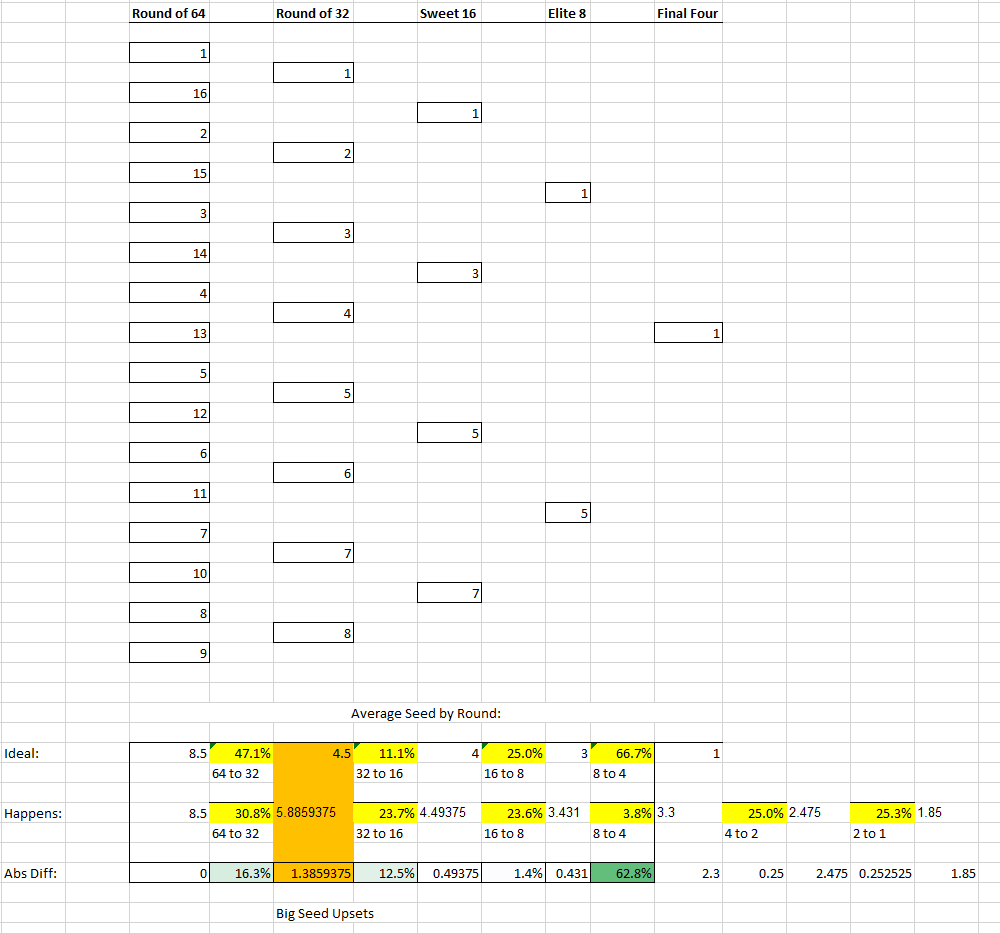

C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

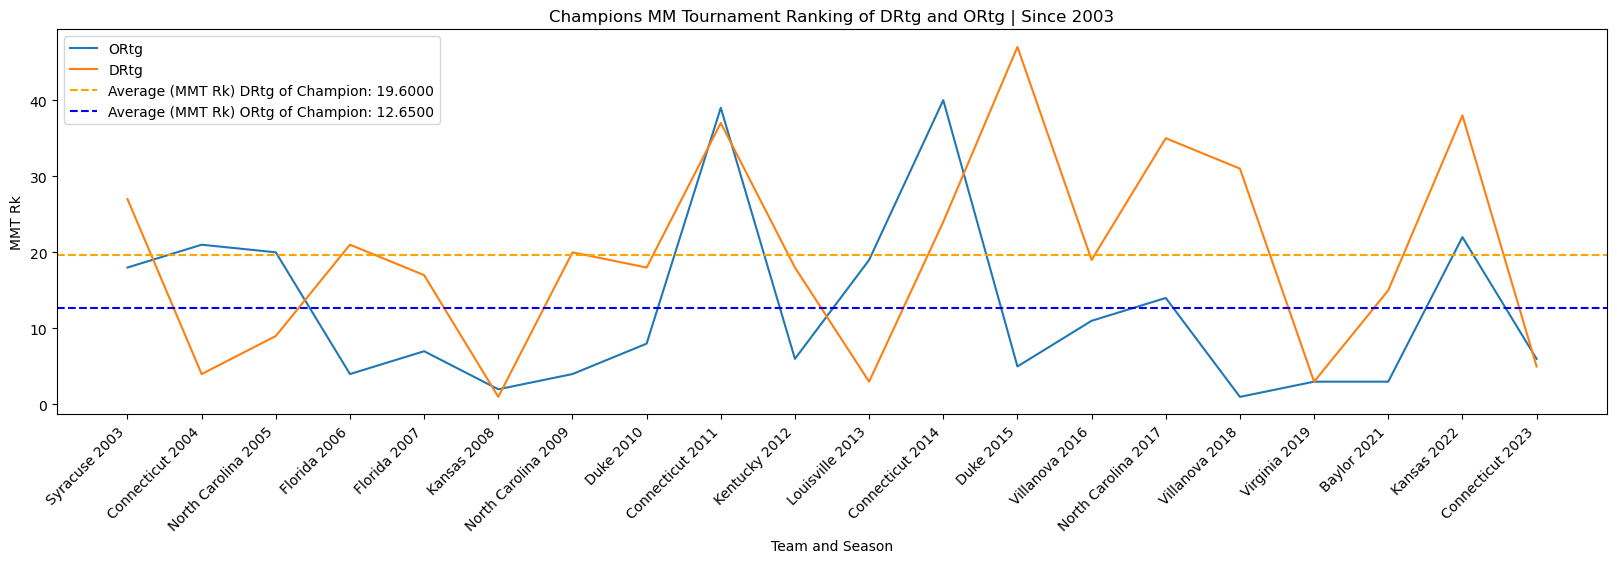

In [26]:
champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

plt.figure(figsize=(20, 5))
plt.title("Champions MM Tournament Ranking of DRtg and ORtg | Since 2003")
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['ORtg'], label="ORtg")
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['DRtg'], label="DRtg")

average_ORtg = champion_sea['ORtg'].mean()
average_DRtg = champion_sea['DRtg'].mean()

plt.axhline(y=average_DRtg, color='orange', linestyle='--', label=f'Average (MMT Rk) DRtg of Champion: {average_DRtg:.4f}')
plt.axhline(y=average_ORtg, color='blue', linestyle='--', label=f'Average (MMT Rk) ORtg of Champion: {average_ORtg:.4f}')

plt.xlabel('Team and Season')
plt.ylabel('MMT Rk')

plt.xticks(rotation=45, ha='right')
plt.legend()

plt.savefig("OvD_chp_lr", bbox_inches='tight', pad_inches=0.1)
image = Image.open("OvD_chp_lr.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("OvD_chp_lr.png")

plt.show()

In [28]:
print("Offense")

champions_df = df[df['champion share'] == 1.00]
unique_ranks = champions_df['ORtg'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['ORtg'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions ORtg MMT Rk {rank}: {percentage:.2f}%")

print("============================================================================\n")    
print("Defense")
    
champions_df = df[df['champion share'] == 1.00]
unique_ranks = champions_df['DRtg'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['DRtg'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions DRtg MMT Rk {rank}: {percentage:.2f}%")

Offense
The percentage of champions ORtg MMT Rk Rank 6.0: 10.00%
The percentage of champions ORtg MMT Rk Rank 3.0: 10.00%
The percentage of champions ORtg MMT Rk Rank 4.0: 10.00%
The percentage of champions ORtg MMT Rk Rank 22.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 1.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 14.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 11.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 5.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 40.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 19.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 39.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 8.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 2.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 7.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 20.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 21.0: 5.00%
The percentage of champions ORtg MMT Rk Rank 18.0: 5.00%

Defense
The percentage of c

In [4]:
5+5+10+10+5

35

In [5]:
5+0+10+5+5

25

C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


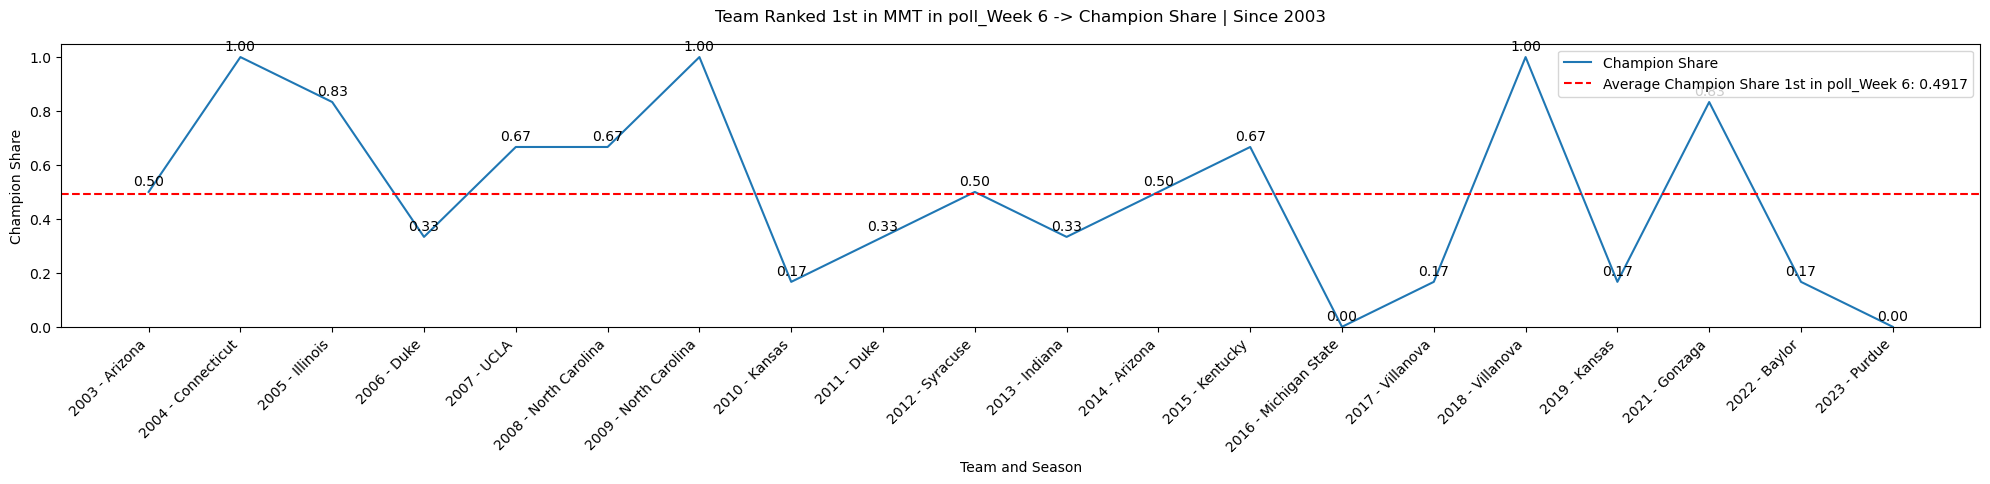

In [29]:
first_in_league_poll_week_6 = df.loc[df['poll_Week 6'] == 1].copy()

first_in_league_poll_week_6.sort_values(by='Season', inplace=True)


plt.figure(figsize=(20, 5))
plt.title("Team Ranked 1st in MMT in poll_Week 6 -> Champion Share | Since 2003", y=1.05)

first_in_league_poll_week_6.loc[:, 'Season'] = first_in_league_poll_week_6['Season'].astype(str)

sns.lineplot(x=first_in_league_poll_week_6['Season'] + " - " + first_in_league_poll_week_6['Team'],
             y=first_in_league_poll_week_6['champion share'],
             label="Champion Share", errorbar=None)

plt.xticks(rotation=45, ha="right")

for i, row in first_in_league_poll_week_6.iterrows():
    plt.annotate(f"{row['champion share']:.2f}", (row['Season'] + " - " + row['Team'], row['champion share']),
                 textcoords="offset points", xytext=(0, 5), ha='center')

average_champion_share = first_in_league_poll_week_6['champion share'].mean()
plt.axhline(y=average_champion_share, color='r', linestyle='--', label=f'Average Champion Share 1st in poll_Week 6: {average_champion_share:.4f}')

plt.xlabel("Team and Season")
plt.ylabel("Champion Share")
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()

plt.savefig("poll_wk6_chps", bbox_inches='tight', pad_inches=0.1)
image = Image.open("poll_wk6_chps.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("poll_wk6_chps.png")

plt.show()

In [32]:
champions_df = df[df['champion share'] == 1.00]
unique_ranks = champions_df['poll_Week 6'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['poll_Week 6'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions poll_Week 6 MMT Rk {rank}: {percentage:.2f}%")

The percentage of champions poll_Week 6 MMT Rk Rank 3.0: 15.00%
The percentage of champions poll_Week 6 MMT Rk Rank 7.0: 15.00%
The percentage of champions poll_Week 6 MMT Rk Rank 6.0: 15.00%
The percentage of champions poll_Week 6 MMT Rk Rank 1.0: 15.00%
The percentage of champions poll_Week 6 MMT Rk Rank 2.0: 10.00%
The percentage of champions poll_Week 6 MMT Rk Rank 5.0: 10.00%
The percentage of champions poll_Week 6 MMT Rk Rank 12.0: 5.00%
The percentage of champions poll_Week 6 MMT Rk Rank 9.0: 5.00%
The percentage of champions poll_Week 6 MMT Rk Rank 4.0: 5.00%
The percentage of champions poll_Week 6 MMT Rk Rank 24.0: 5.00%


In [33]:
#Champions | Summary Stats 
champion = df.loc[df['champion share'] == 1.00]
champion_poll_Week6_stats = champion['poll_Week 6'].describe()

print("Summary Statistics for Champions' MMT Rk of poll_Week 6:")
print(champion_poll_Week6_stats)

Summary Statistics for Champions' MMT Rk of poll_Week 6:
count    20.000000
mean      5.700000
std       5.181952
min       1.000000
25%       2.750000
50%       5.000000
75%       7.000000
max      24.000000
Name: poll_Week 6, dtype: float64


### Analysis of Week 6 Top 25 AP Polls
- On average teams that rank 1st in the tournament in ap poll week 6 get about 3 tourney wins (2.9502 wins)
- 70% of the time (about 13/19 last champions) rank top 6 in week 6 ap polls (top 25)
- all champions ranked in top 11 on week 6 ap polls

C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


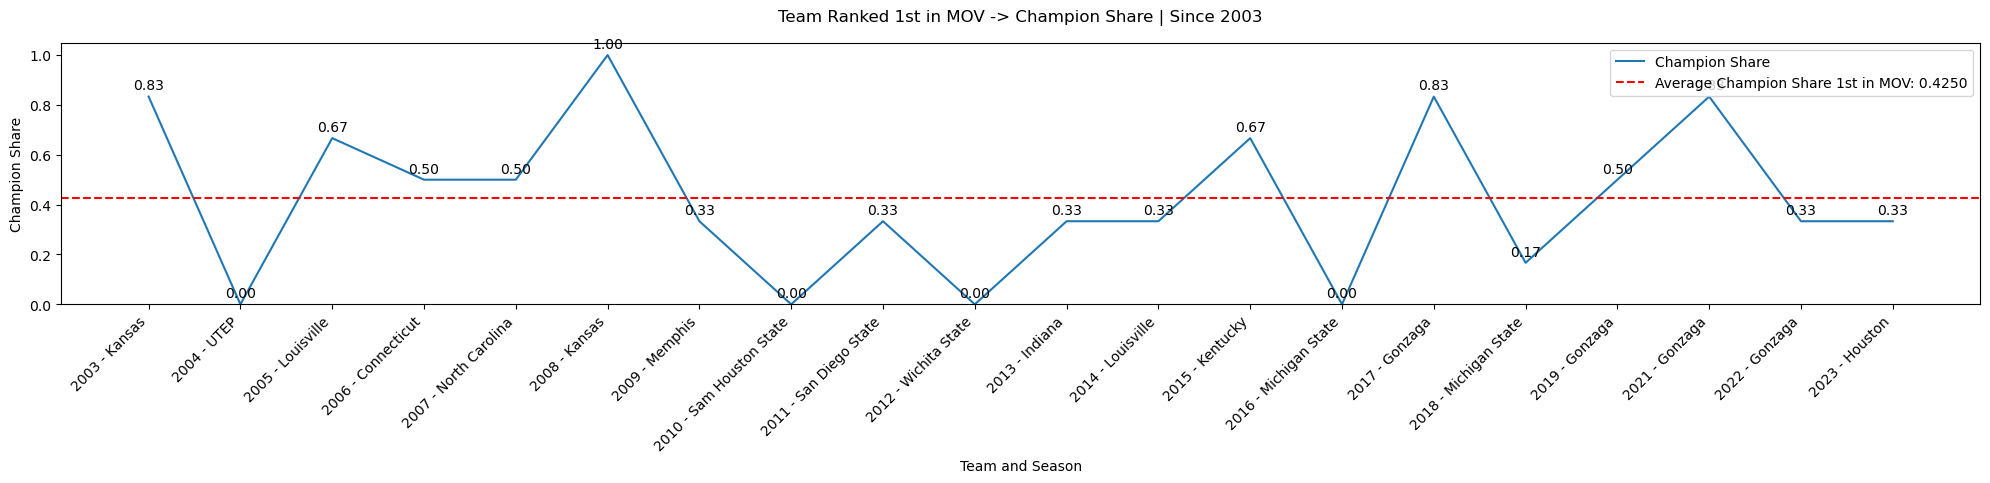

In [34]:
first_in_league_mov = df.loc[df['MOV'] == 1].copy()

first_in_league_mov.sort_values(by='Season', inplace=True)


plt.figure(figsize=(20, 5))
plt.title("Team Ranked 1st in MOV -> Champion Share | Since 2003", y=1.05)

first_in_league_mov.loc[:, 'Season'] = first_in_league_mov['Season'].astype(str)

sns.lineplot(x=first_in_league_mov['Season'] + " - " + first_in_league_mov['Team'],
             y=first_in_league_mov['champion share'],
             label="Champion Share", errorbar=None)

plt.xticks(rotation=45, ha="right")

for i, row in first_in_league_mov.iterrows():
    plt.annotate(f"{row['champion share']:.2f}", (row['Season'] + " - " + row['Team'], row['champion share']),
                 textcoords="offset points", xytext=(0, 5), ha='center')

average_champion_share = first_in_league_mov['champion share'].mean()
plt.axhline(y=average_champion_share, color='r', linestyle='--', label=f'Average Champion Share 1st in MOV: {average_champion_share:.4f}')

plt.xlabel("Team and Season")
plt.ylabel("Champion Share")
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()
plt.show()

In [36]:
champions_df = df[df['champion share'] == 1.00]
unique_ranks = champions_df['MOV'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['MOV'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions MOV {rank}: {percentage:.2f}%")

The percentage of champions MOV Rank 3.0: 30.00%
The percentage of champions MOV Rank 2.0: 10.00%
The percentage of champions MOV Rank 12.0: 10.00%
The percentage of champions MOV Rank 24.0: 5.00%
The percentage of champions MOV Rank 4.0: 5.00%
The percentage of champions MOV Rank 6.0: 5.00%
The percentage of champions MOV Rank 16.0: 5.00%
The percentage of champions MOV Rank 10.0: 5.00%
The percentage of champions MOV Rank 38.0: 5.00%
The percentage of champions MOV Rank 39.0: 5.00%
The percentage of champions MOV Rank 5.0: 5.00%
The percentage of champions MOV Rank 1.0: 5.00%
The percentage of champions MOV Rank 9.0: 5.00%


C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


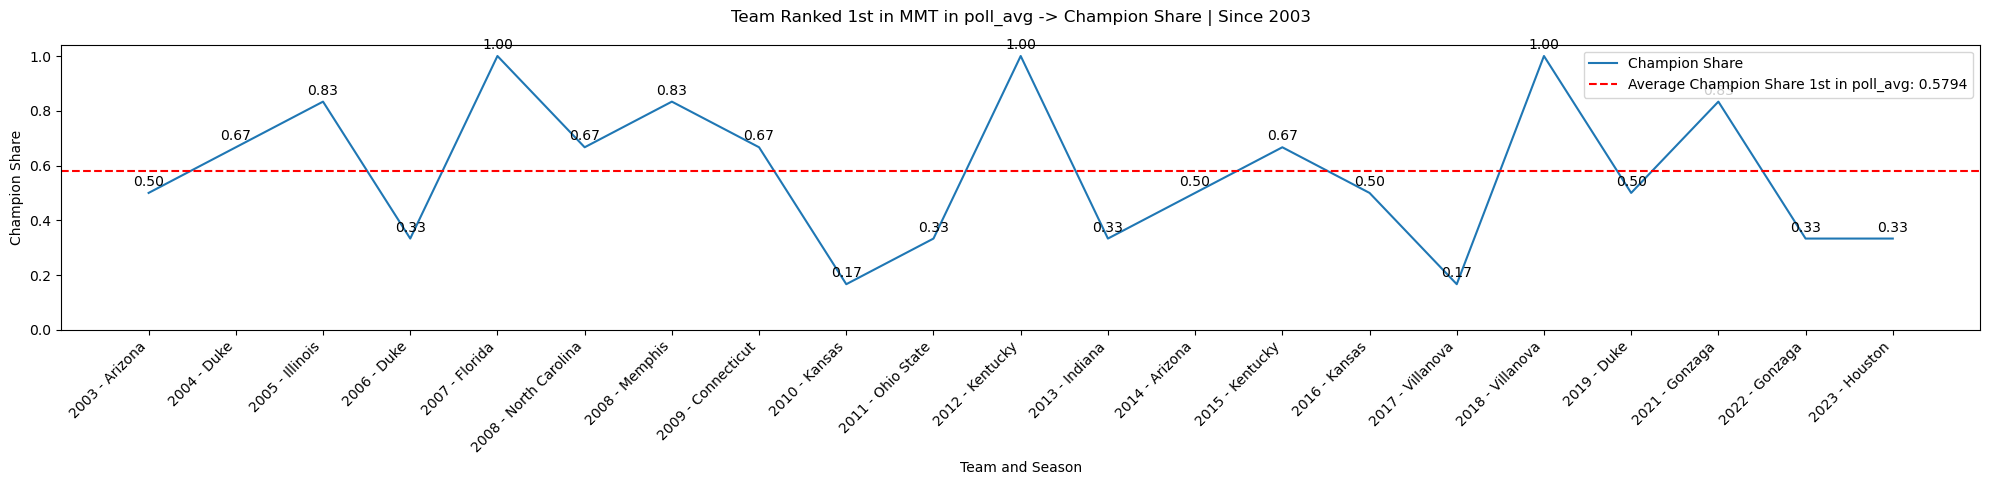

In [37]:
first_in_league_poll_avg = df.loc[df['poll_avg'] == 1].copy()

first_in_league_poll_avg.sort_values(by='Season', inplace=True)


plt.figure(figsize=(20, 5))
plt.title("Team Ranked 1st in MMT in poll_avg -> Champion Share | Since 2003", y=1.05)

first_in_league_poll_avg.loc[:, 'Season'] = first_in_league_poll_avg['Season'].astype(str)

sns.lineplot(x=first_in_league_poll_avg['Season'] + " - " + first_in_league_poll_avg['Team'],
             y=first_in_league_poll_avg['champion share'],
             label="Champion Share", errorbar=None)

plt.xticks(rotation=45, ha="right")

for i, row in first_in_league_poll_avg.iterrows():
    plt.annotate(f"{row['champion share']:.2f}", (row['Season'] + " - " + row['Team'], row['champion share']),
                 textcoords="offset points", xytext=(0, 5), ha='center')

average_champion_share = first_in_league_poll_avg['champion share'].mean()
plt.axhline(y=average_champion_share, color='r', linestyle='--', label=f'Average Champion Share 1st in poll_avg: {average_champion_share:.4f}')

plt.xlabel("Team and Season")
plt.ylabel("Champion Share")
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()

plt.savefig("rk_1st_poll_avg", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rk_1st_poll_avg.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rk_1st_poll_avg.png")

plt.show()

### Analysis of teams ranked 1st in overall poll average
- Teams ranked 1st in MMT in total poll average (reverse Order - pre 1 - 18) on average achieve 3.48 wins in the tourney
- Teams ranked 1st in MMT in total poll average (reverse Order - pre 1 - 18) at minimum get a win the tournament.
- 75% of the time the champion is top 6 in this feature
- 66% of the time team ranked 1st is this feature makes it to at least the elite 8.

In [39]:
champions_df = df[df['champion share'] == 1.00]
unique_ranks = champions_df['poll_avg'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['poll_avg'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions poll_avg {rank}: {percentage:.2f}%")

The percentage of champions poll_avg Rank 2.0: 20.00%
The percentage of champions poll_avg Rank 1.0: 15.00%
The percentage of champions poll_avg Rank 5.0: 10.00%
The percentage of champions poll_avg Rank 3.0: 10.00%
The percentage of champions poll_avg Rank 6.0: 10.00%
The percentage of champions poll_avg Rank 4.0: 10.00%
The percentage of champions poll_avg Rank 8.0: 10.00%
The percentage of champions poll_avg Rank 12.0: 5.00%
The percentage of champions poll_avg Rank 18.0: 5.00%
The percentage of champions poll_avg Rank 25.0: 5.00%


In [93]:
1+1+1+1+1+1

6

In [96]:
14/21

0.6666666666666666

In [89]:
.5794*6

3.4764

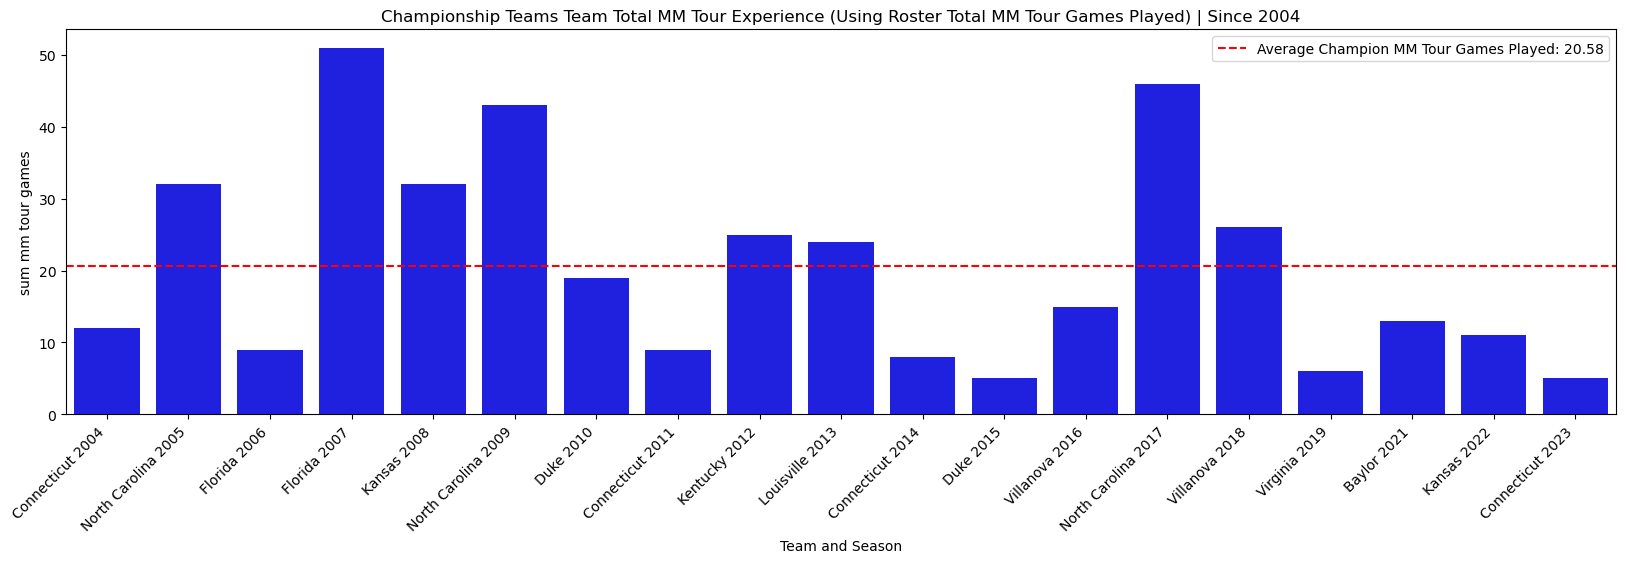

In [40]:
df = pd.read_csv("NCAA Champion RawData.csv")
#df = pd.read_csv("NCAA Champion LR Data.csv")
df.drop(df[df['Season'] < 2004].index, inplace = True)

champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

champion_sea['team_season'] = champion_sea['Team'] + ' ' + champion_sea['Season']

plt.figure(figsize=(20, 5))
plt.title("Championship Teams Team Total MM Tour Experience (Using Roster Total MM Tour Games Played) | Since 2004")

sns.barplot(x=champion_sea['team_season'], y=champion_sea['sum mm tour games'], color='blue')

average_mvp = champion_sea['sum mm tour games'].mean()

plt.axhline(y=average_mvp, color='r', linestyle='--', label=f'Average Champion MM Tour Games Played: {average_mvp:.2f}')

plt.xlabel('Team and Season')
plt.ylabel('sum mm tour games')
plt.xticks(rotation=45, ha='right')
plt.legend().set_visible(True)

plt.savefig("MMT_exp_chps", bbox_inches='tight', pad_inches=0.1)
image = Image.open("MMT_exp_chps.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("MMT_exp_chps.png")

plt.show()

In [41]:
corr = data.corr().abs()
selected_features = corr.loc[corr['champion share']>.25].index
print(selected_features.tolist())

['champion share', 'Seed_Tournament', 'Seed_1', 'Top_4_Seed_True', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L3Y cs', 'sum school L5Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school E8 apps', 'FIC40', 'ORtg', 'eDiff', 'MOV', 'Ast/TO', "W's", "L's", 'Win %', 'FGM', 'sum mm tour games', 'sum polls made', 'poll_Pre 1', 'poll_Week 2', 'poll_Week 3', 'poll_Week 4', 'poll_Week 5', 'poll_Week 6', 'poll_Week 7', 'poll_Week 8', 'poll_Week 9', 'poll_Week 10', 'poll_Week 11', 'poll_Week 12', 'poll_Week 13', 'poll_Week 14', 'poll_Week 15', 'poll_Week 16', 'poll_Week 17', 'poll_Week 18', 'poll_avg', 'top_12_Week 12', 'team_rating_avg_custom', 'max_player_rating_custom', 'cf_rating_custom', 'bracket_region_rating_custom']


C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


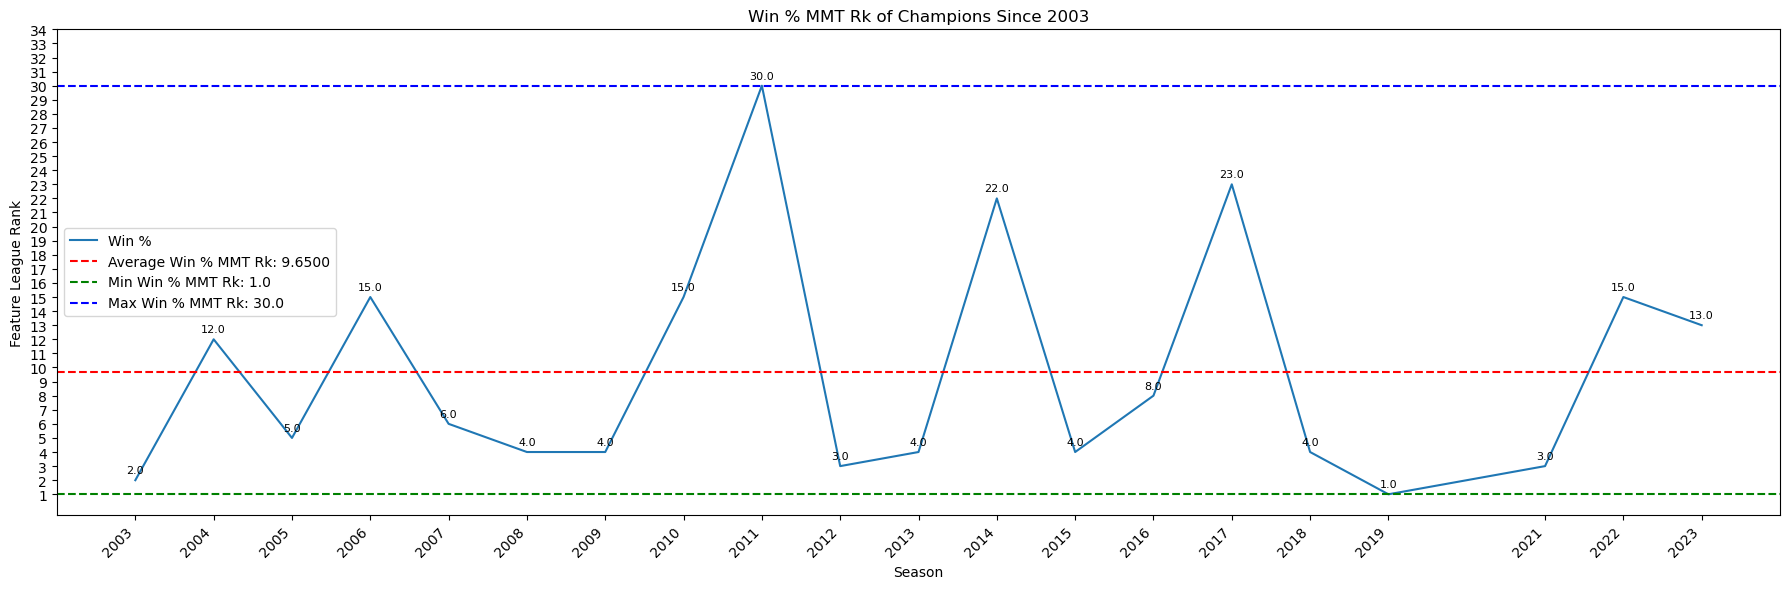

In [42]:
#df = pd.read_csv("NCAA Champion RawData.csv")
df = pd.read_csv("NCAA Champion LR Data.csv")

champion = df.loc[df['champion share'] == 1.00]

plt.figure(figsize=(18, 6))

sns.lineplot(x=champion['Season'], y=champion['Win %'], label="Win %", err_style="band")

plt.xticks(champion['Season'].unique(), rotation=45, ha="right")

plt.yticks(range(1, 35))

average_champion_wins_ranking = champion['Win %'].mean()
min_champion_wins_ranking = champion['Win %'].min()
max_champion_wins_ranking = champion['Win %'].max()

plt.axhline(y=average_champion_wins_ranking, color='r', linestyle='--', label=f'Average Win % MMT Rk: {average_champion_wins_ranking:.4f}')
plt.axhline(y=min_champion_wins_ranking, color='g', linestyle='--', label=f'Min Win % MMT Rk: {min_champion_wins_ranking}')
plt.axhline(y=max_champion_wins_ranking, color='b', linestyle='--', label=f'Max Win % MMT Rk: {max_champion_wins_ranking}')

for season, rank in zip(champion['Season'], champion['Win %']):
    plt.annotate(f'{rank}', (season, rank), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='black')

plt.title("Win % MMT Rk of Champions Since 2003")
plt.xlabel("Season")
plt.ylabel("Feature League Rank")
plt.legend()
plt.tight_layout()

#plt.savefig("line_chart_wins.png", bbox_inches='tight', pad_inches=0.1)
#image = Image.open("line_chart_wins.png")
#image_with_border = ImageOps.expand(image, border=2, fill='black')
#image_with_border.save("line_chart_wins.png")

plt.show()

In [43]:
champions_df = df[df['champion share'] == 1.00]
unique_ranks = champions_df['Win %'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['Win %'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions Win % MMT Rk {rank}: {percentage:.2f}%")

The percentage of champions Win % MMT Rk Rank 4.0: 25.00%
The percentage of champions Win % MMT Rk Rank 15.0: 15.00%
The percentage of champions Win % MMT Rk Rank 3.0: 10.00%
The percentage of champions Win % MMT Rk Rank 13.0: 5.00%
The percentage of champions Win % MMT Rk Rank 1.0: 5.00%
The percentage of champions Win % MMT Rk Rank 23.0: 5.00%
The percentage of champions Win % MMT Rk Rank 8.0: 5.00%
The percentage of champions Win % MMT Rk Rank 22.0: 5.00%
The percentage of champions Win % MMT Rk Rank 30.0: 5.00%
The percentage of champions Win % MMT Rk Rank 6.0: 5.00%
The percentage of champions Win % MMT Rk Rank 5.0: 5.00%
The percentage of champions Win % MMT Rk Rank 12.0: 5.00%
The percentage of champions Win % MMT Rk Rank 2.0: 5.00%


In [44]:
df = pd.read_csv("NCAA Champion LR Data.csv")
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'round make', 'champion share', 'make tournament', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'Top_4_Seed_True', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L3Y cs', 'sum school L5Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school Finals apps', 'sum school F4 apps', 'sum school E8 apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 'PF', 'sum mm tour games', '

C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

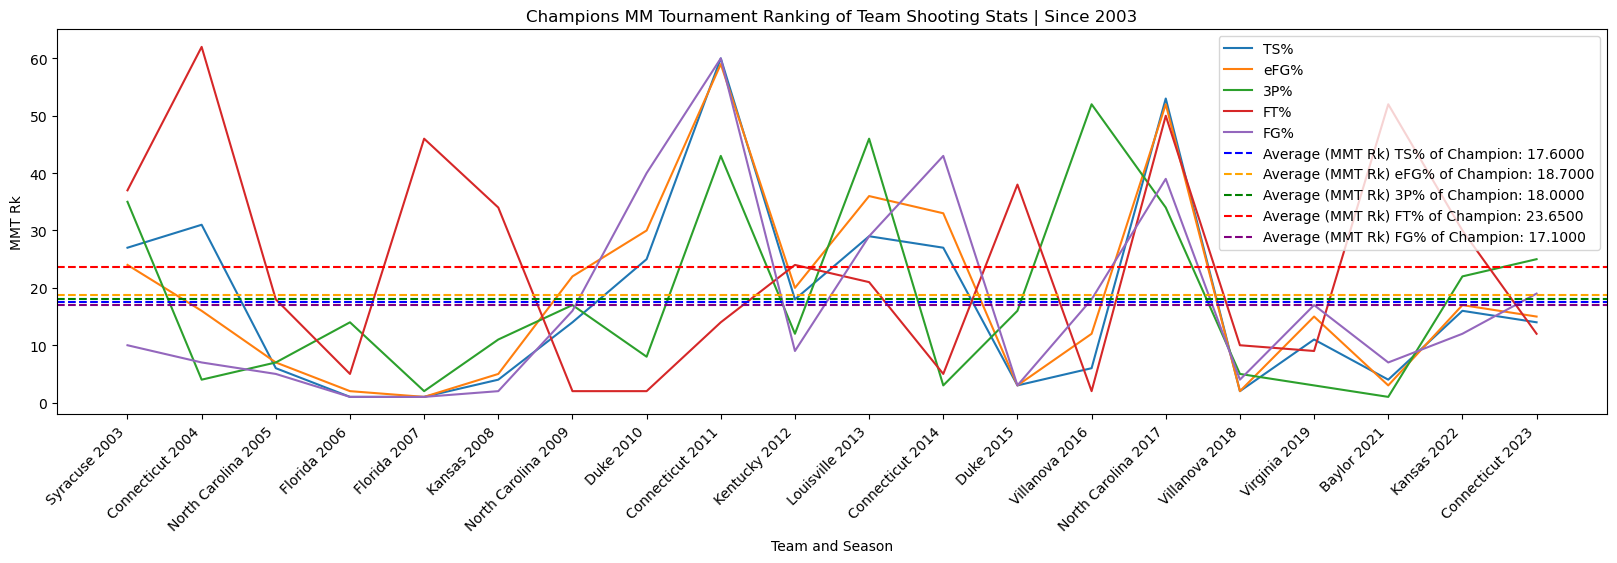

In [45]:
#df = pd.read_csv("NCAA Champion RawData.csv")
df = pd.read_csv("NCAA Champion LR Data.csv")

champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

plt.figure(figsize=(20, 5))
plt.title("Champions MM Tournament Ranking of Team Shooting Stats | Since 2003")
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['TS%'], label='TS%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['eFG%'], label='eFG%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['3P%'], label='3P%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['FT%'], label='FT%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['FG%'], label='FG%')

average_ts = champion_sea['TS%'].mean()
average_efg = champion_sea['eFG%'].mean()
average_three = champion_sea['3P%'].mean()
average_free = champion_sea['FT%'].mean()
average_field = champion_sea['FG%'].mean()

plt.axhline(y=average_ts, color='blue', linestyle='--', label=f'Average (MMT Rk) TS% of Champion: {average_ts:.4f}')
plt.axhline(y=average_efg, color='orange', linestyle='--', label=f'Average (MMT Rk) eFG% of Champion: {average_efg:.4f}')
plt.axhline(y=average_three, color='green', linestyle='--', label=f'Average (MMT Rk) 3P% of Champion: {average_three:.4f}')
plt.axhline(y=average_free, color='red', linestyle='--', label=f'Average (MMT Rk) FT% of Champion: {average_free:.4f}')
plt.axhline(y=average_field, color='purple', linestyle='--', label=f'Average (MMT Rk) FG% of Champion: {average_field:.4f}')

plt.xlabel('Team and Season')
plt.ylabel('MMT Rk')

plt.xticks(rotation=45, ha='right')
plt.legend()

plt.savefig("MMT_chps_sht_stats", bbox_inches='tight', pad_inches=0.1)
image = Image.open("MMT_chps_sht_stats.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("MMT_chps_sht_stats.png")

plt.show()

### Shooting Stats Analysis:
- Championship teams need to be in the upper quartile in terms of team shooting stats. 
- Every tournament takes in 64 teams, so average all TM rankings of teams shooting stats they need to in the 1st quartile, 18.79 and below.
- True shooting is the best shooting team measurment.

C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\allen\Anaconda_Files\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to 

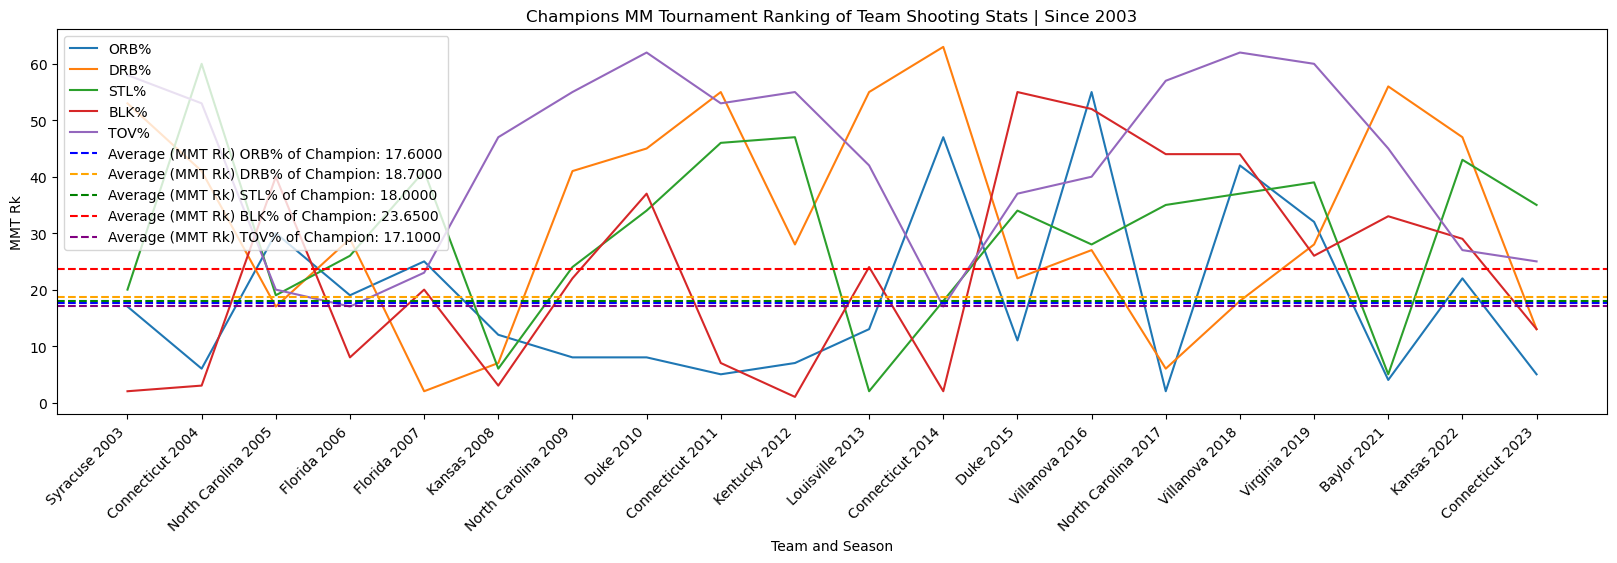

In [46]:
#df = pd.read_csv("NCAA Champion RawData.csv")
df = pd.read_csv("NCAA Champion LR Data.csv")

champion_sea = df.loc[df['champion share'] == 1].copy()  

champion_sea.sort_values(by='Season', inplace=True)

champion_sea['Season'] = champion_sea['Season'].astype(str)

plt.figure(figsize=(20, 5))
plt.title("Champions MM Tournament Ranking of Team Shooting Stats | Since 2003")
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['ORB%'], label='ORB%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['DRB%'], label='DRB%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['STL%'], label='STL%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['BLK%'], label='BLK%')
sns.lineplot(x=champion_sea['Team'] + ' ' + champion_sea['Season'], y=champion_sea['TOV%'], label='TOV%')

average_orb = champion_sea['ORB%'].mean()
average_drb = champion_sea['DRB%'].mean()
average_stl = champion_sea['STL%'].mean()
average_blk = champion_sea['BLK%'].mean()
average_tov = champion_sea['TOV%'].mean()

plt.axhline(y=average_ts, color='blue', linestyle='--', label=f'Average (MMT Rk) ORB% of Champion: {average_ts:.4f}')
plt.axhline(y=average_efg, color='orange', linestyle='--', label=f'Average (MMT Rk) DRB% of Champion: {average_efg:.4f}')
plt.axhline(y=average_three, color='green', linestyle='--', label=f'Average (MMT Rk) STL% of Champion: {average_three:.4f}')
plt.axhline(y=average_free, color='red', linestyle='--', label=f'Average (MMT Rk) BLK% of Champion: {average_free:.4f}')
plt.axhline(y=average_field, color='purple', linestyle='--', label=f'Average (MMT Rk) TOV% of Champion: {average_field:.4f}')

plt.xlabel('Team and Season')
plt.ylabel('MMT Rk')

plt.xticks(rotation=45, ha='right')
plt.legend() 
plt.show()

### Defense Stats Analysis:
- Championship teams need to be in the upper quartile in terms of team overall defensive stats. 
- Every tournament takes in 64 teams, so average all TM rankings of teams shooting stats they need to in the 1st quartile, 18.79 and below.
- Offensive rebounds are more important then defensive rebounds in terms mmt wins.

In [67]:
df = pd.read_csv("NCAA Champion LR Data.csv")
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'round make', 'champion share', 'make tournament', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'Top_4_Seed_True', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L3Y cs', 'sum school L5Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school Finals apps', 'sum school F4 apps', 'sum school E8 apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 'PF', 'sum mm tour games', '

Column Averages:
cf_rating_custom                 9.55
bracket_region_rating_custom    20.20
dtype: float64


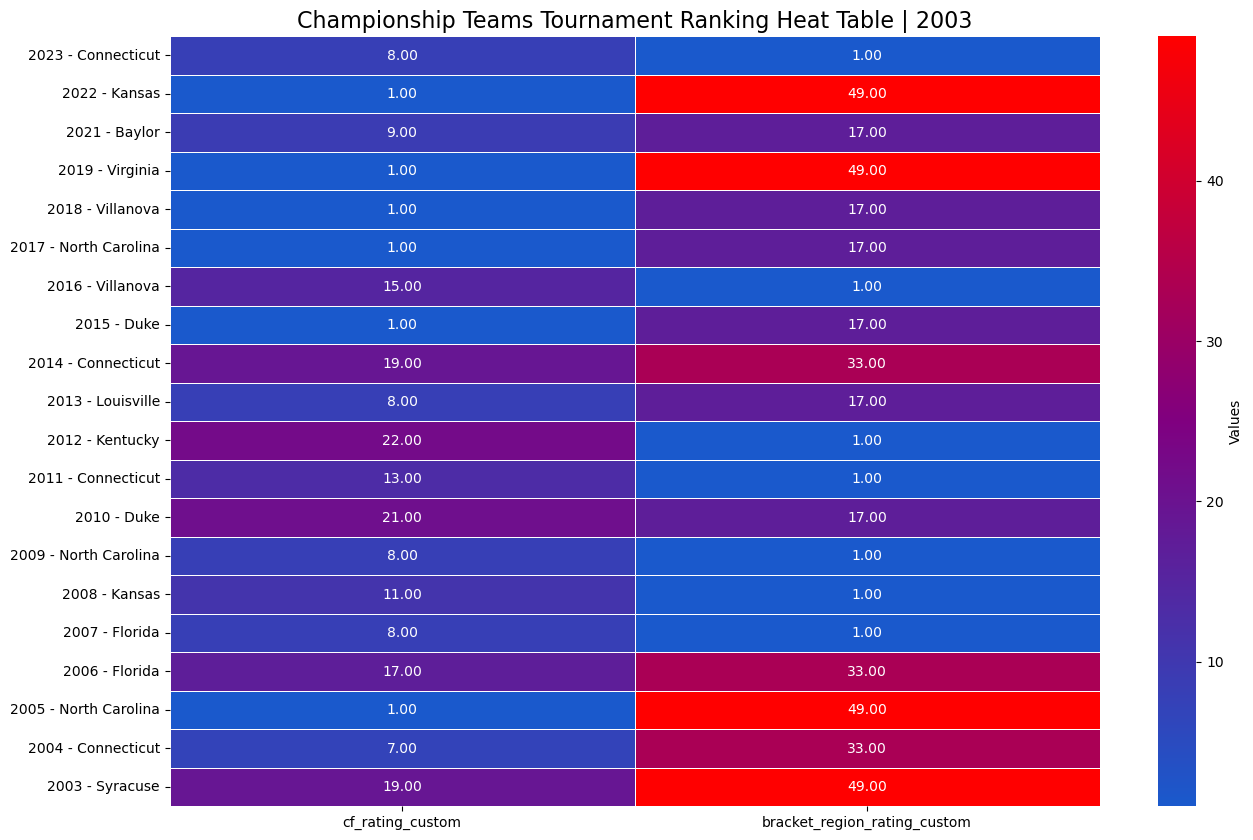

In [13]:
from matplotlib.colors import ListedColormap

champions_only = df[df['champion share'] == 1]

custom_palette = sns.color_palette("pastel", as_cmap=True)

large_color = 'red'  
middle_color = 'purple'
small_color = (0.1, 0.35, .8)

large_threshold = 1.5  
middle_threshold = 0.5 

colors = sns.color_palette([small_color, middle_color, large_color], as_cmap=True)
custom_cmap = sns.blend_palette(colors, as_cmap=True)

plt.figure(figsize=(15, 10))
heatmap_data = champions_only[['cf_rating_custom', 'bracket_region_rating_custom']]

heatmap = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=.5, cbar_kws={'label': 'Values'}, vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())

championship_teams_labels = ['{} - {}'.format(season, team) for season, team in zip(champions_only['Season'], champions_only['Team'])]
plt.yticks(ticks=[i + 0.5 for i in range(len(championship_teams_labels))], labels=championship_teams_labels, rotation=0)

column_averages = heatmap_data.mean()
print("Column Averages:")
print(column_averages)

plt.title('Championship Teams Tournament Ranking Heat Table | 2003', fontsize=16)
plt.savefig("ht_allChamps_2_fea.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ht_allChamps_2_fea.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ht_allChamps_2_fea.png")

plt.show()

In [14]:
print("region_rating\n")

champions_df = df[df['champion share'] == 1.00]
unique_ranks = champions_df['bracket_region_rating_custom'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['bracket_region_rating_custom'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions region {rank}: {percentage:.2f}%")
    
print("cf_rating\n")

champions_df = df[df['champion share'] == 1.00]
unique_ranks = champions_df['cf_rating_custom'].unique()
percentage_results = {}

for rank in unique_ranks:
    champions_with_rank = champions_df[champions_df['cf_rating_custom'] == rank]
    total_champions = champions_df.shape[0]
    percentage = (champions_with_rank.shape[0] / total_champions) * 100
    percentage_results[f'Rank {rank}'] = percentage

sorted_results = sorted(percentage_results.items(), key=lambda x: x[1], reverse=True)

for rank, percentage in sorted_results:
    print(f"The percentage of champions cf {rank}: {percentage:.2f}%")

region_rating

The percentage of champions region Rank 1.0: 35.00%
The percentage of champions region Rank 17.0: 30.00%
The percentage of champions region Rank 49.0: 20.00%
The percentage of champions region Rank 33.0: 15.00%
cf_rating

The percentage of champions cf Rank 1.0: 30.00%
The percentage of champions cf Rank 8.0: 20.00%
The percentage of champions cf Rank 19.0: 10.00%
The percentage of champions cf Rank 9.0: 5.00%
The percentage of champions cf Rank 15.0: 5.00%
The percentage of champions cf Rank 22.0: 5.00%
The percentage of champions cf Rank 13.0: 5.00%
The percentage of champions cf Rank 21.0: 5.00%
The percentage of champions cf Rank 11.0: 5.00%
The percentage of champions cf Rank 17.0: 5.00%
The percentage of champions cf Rank 7.0: 5.00%


### Does strength of conference and bracket region play into tournament success?

Summarization:
-65% of the time the champion comes out of the two toughtest regions of bracket
-30% (majority) of the time the champion comes out of the toughtest conference

In [74]:
30+20+

16.0

In [75]:
(17.4+18.5+17.65+23.4+17)/5

18.79

win 64 (1 win) -> win 32 (2 wins) -> win 16 (3 wins) -> win 8 (4 wins) -> win 4 (5 wins) -> win 2 (6 wins)

In [51]:
corr = data.corr().abs()
selected_features = corr.loc[corr['champion share']>.25].index
print(selected_features.tolist())

['champion share', 'Seed_Tournament', 'Seed_1', 'Top_4_Seed_True', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L3Y cs', 'sum school L5Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school E8 apps', 'FIC40', 'ORtg', 'eDiff', 'MOV', 'Ast/TO', "W's", "L's", 'Win %', 'FGM', 'sum mm tour games', 'sum polls made', 'poll_Pre 1', 'poll_Week 2', 'poll_Week 3', 'poll_Week 4', 'poll_Week 5', 'poll_Week 6', 'poll_Week 7', 'poll_Week 8', 'poll_Week 9', 'poll_Week 10', 'poll_Week 11', 'poll_Week 12', 'poll_Week 13', 'poll_Week 14', 'poll_Week 15', 'poll_Week 16', 'poll_Week 17', 'poll_Week 18', 'poll_avg', 'top_12_Week 12', 'team_rating_avg_custom', 'max_player_rating_custom', 'cf_rating_custom', 'bracket_region_rating_custom']


In [19]:
df = pd.read_csv("NCAA Champion LR Data.csv")
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'AdjTempo', 'AdjOE', 'AdjDE', 'AdjEM', 'AdjTempo Rk', 'AdjOE Rk', 'AdjDE Rk', 'AdjEM Rk', 'Top 6 AdjEM Rk', 'round make', 'champion share', 'make tournament', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'Top_4_Seed_True', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L3Y cs', 'sum school L5Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school Finals apps', 'sum school F4 apps', 'sum school E8 apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FG

Column Averages:
Top_4_Seed_True              0.95
team_rating_avg_custom_2     4.25
sum polls made               4.20
poll_Pre 1                   8.25
AdjOE                        7.80
3PA                         31.55
sum school cs                8.35
sum conf L1Y cs             13.30
poll_Week 13                 7.55
poll_Week 4                  6.30
sum mm tour games           15.40
PF                          40.95
Stl/TO                      19.55
DRtg                        19.60
BPG                         20.30
AST%                        27.70
sum conf L10Y cs            15.85
sum conf L3Y cs             15.10
sum coach mmt gp            11.20
DRB%                        32.65
dtype: float64


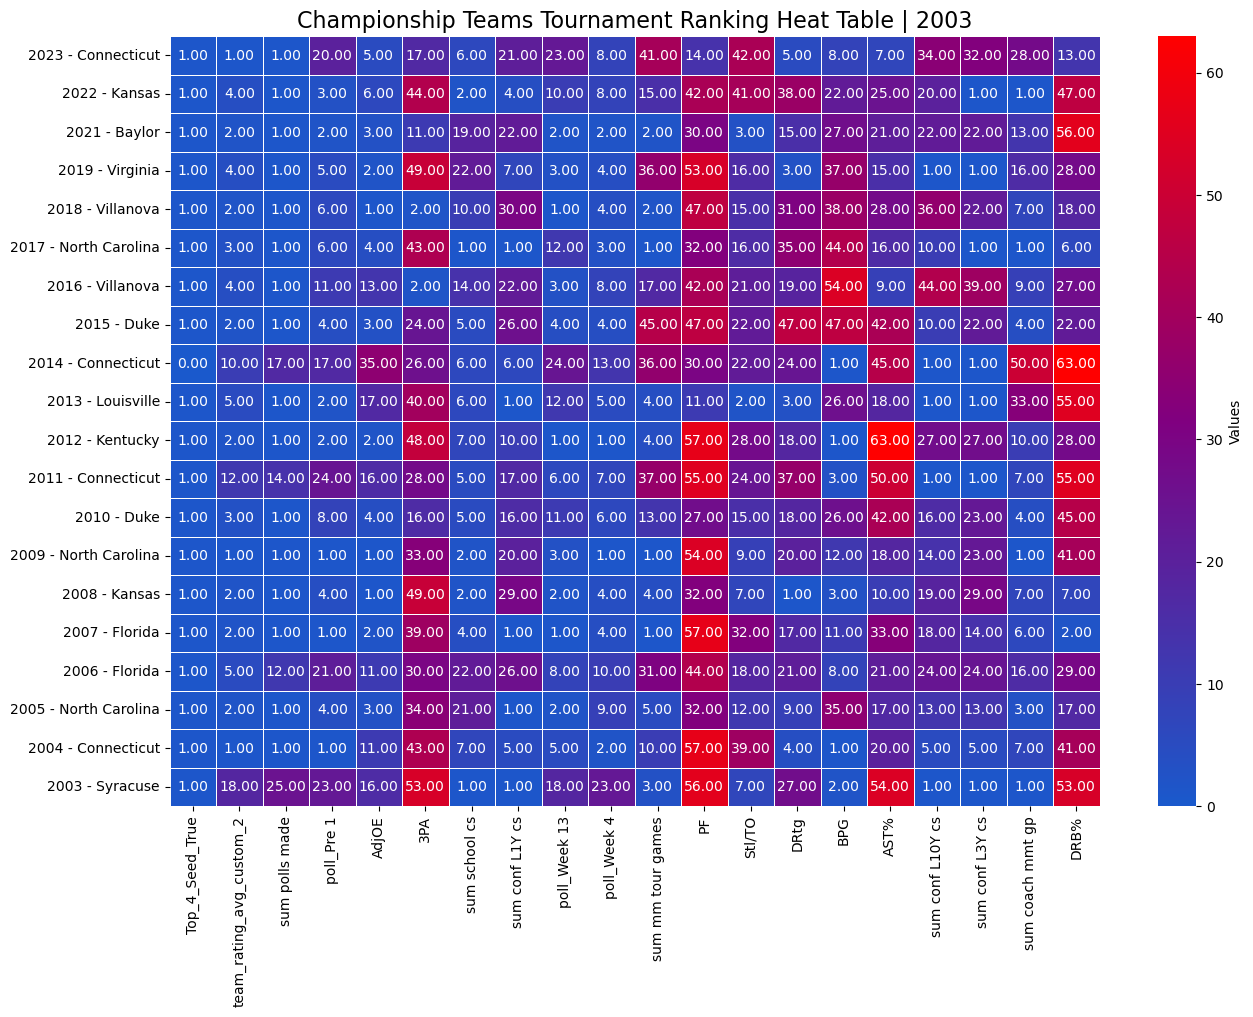

In [3]:
from matplotlib.colors import ListedColormap

champions_only = df[df['champion share'] == 1]

custom_palette = sns.color_palette("pastel", as_cmap=True)

large_color = 'red'  
middle_color = 'purple'
small_color = (0.1, 0.35, .8)

large_threshold = 1.5  
middle_threshold = 0.5 

colors = sns.color_palette([small_color, middle_color, large_color], as_cmap=True)
custom_cmap = sns.blend_palette(colors, as_cmap=True)

plt.figure(figsize=(15, 10))
heatmap_data = champions_only[['Top_4_Seed_True', 'team_rating_avg_custom_2', 'sum polls made', 'poll_Pre 1', 'AdjOE', '3PA', 'sum school cs', 'sum conf L1Y cs', 'poll_Week 13', 'poll_Week 4', 'sum mm tour games', 'PF', 'Stl/TO', 'DRtg', 'BPG', 'AST%', 'sum conf L10Y cs', 'sum conf L3Y cs', 'sum coach mmt gp', 'DRB%']]

heatmap = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=.5, cbar_kws={'label': 'Values'}, vmin=heatmap_data.min().min(), vmax=heatmap_data.max().max())

championship_teams_labels = ['{} - {}'.format(season, team) for season, team in zip(champions_only['Season'], champions_only['Team'])]
plt.yticks(ticks=[i + 0.5 for i in range(len(championship_teams_labels))], labels=championship_teams_labels, rotation=0)

column_averages = heatmap_data.mean()
print("Column Averages:")
print(column_averages)

plt.title('Championship Teams Tournament Ranking Heat Table | 2003', fontsize=16)
plt.savefig("ht_allChamps_fea_table.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ht_allChamps_fea_table.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ht_allChamps_fea_table.png")

plt.show()

In [18]:
df = pd.read_csv("NCAA Champion LR Data.csv")
print(list(df.columns))

['Season', '#', 'Team/Season', 'Team', 'Team ID', 'Team ID/Season', 'Conference', 'Conference/Season', 'Bracket Region', 'Bracket Region/Season', 'sum coach mmt gp', 'sum coach sea coa', 'AdjTempo', 'AdjOE', 'AdjDE', 'AdjEM', 'AdjTempo Rk', 'AdjOE Rk', 'AdjDE Rk', 'AdjEM Rk', 'Top 6 AdjEM Rk', 'round make', 'champion share', 'make tournament', 'Seed_Tournament', 'Seed_1', 'Seed_2', 'Seed_3', 'Seed_4', 'Top_4_Seed_True', 'sum conf L1Y cs', 'sum conf L3Y cs', 'sum conf L5Y cs', 'sum conf L8Y cs', 'sum conf L10Y cs', 'sum school L1Y cs', 'sum school L3Y cs', 'sum school L5Y cs', 'sum school L8Y cs', 'sum school L10Y cs', 'sum school champion', 'sum school Finals apps', 'sum school F4 apps', 'sum school E8 apps', 'TS%', 'eFG%', 'Total S%', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'TOV%', 'STL%', 'BLK%', 'PPS', 'FIC40', 'ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's"

Column Averages:
ORtg         32.333333
DRtg         29.333333
eDiff        31.666667
Poss         28.333333
Pace         24.000000
Dbl Dbl      21.333333
Tpl Dbl       8.333333
40 Pts        5.333333
20 Reb        4.000000
20 Ast        1.000000
5 Stl        15.666667
5 Blk         7.000000
High Game    33.666667
MOV          29.666667
Techs        22.333333
HOB          49.666667
Ast/TO       26.666667
Stl/TO       17.666667
FT/FGA       43.000000
W's          23.333333
L's          36.000000
Win %        18.000000
GP           22.666667
MPG          26.333333
PPG          23.666667
FGM          23.333333
FGA          17.666667
FG%          37.666667
3PM          34.666667
3PA          35.666667
3P%          27.000000
FTM          38.000000
FTA          44.000000
FT%          18.666667
ORB          22.000000
DRB          20.333333
RPG          21.333333
APG          37.000000
SPG          23.333333
BPG           2.000000
TOV          38.000000
PF           47.000000
dtype: float64


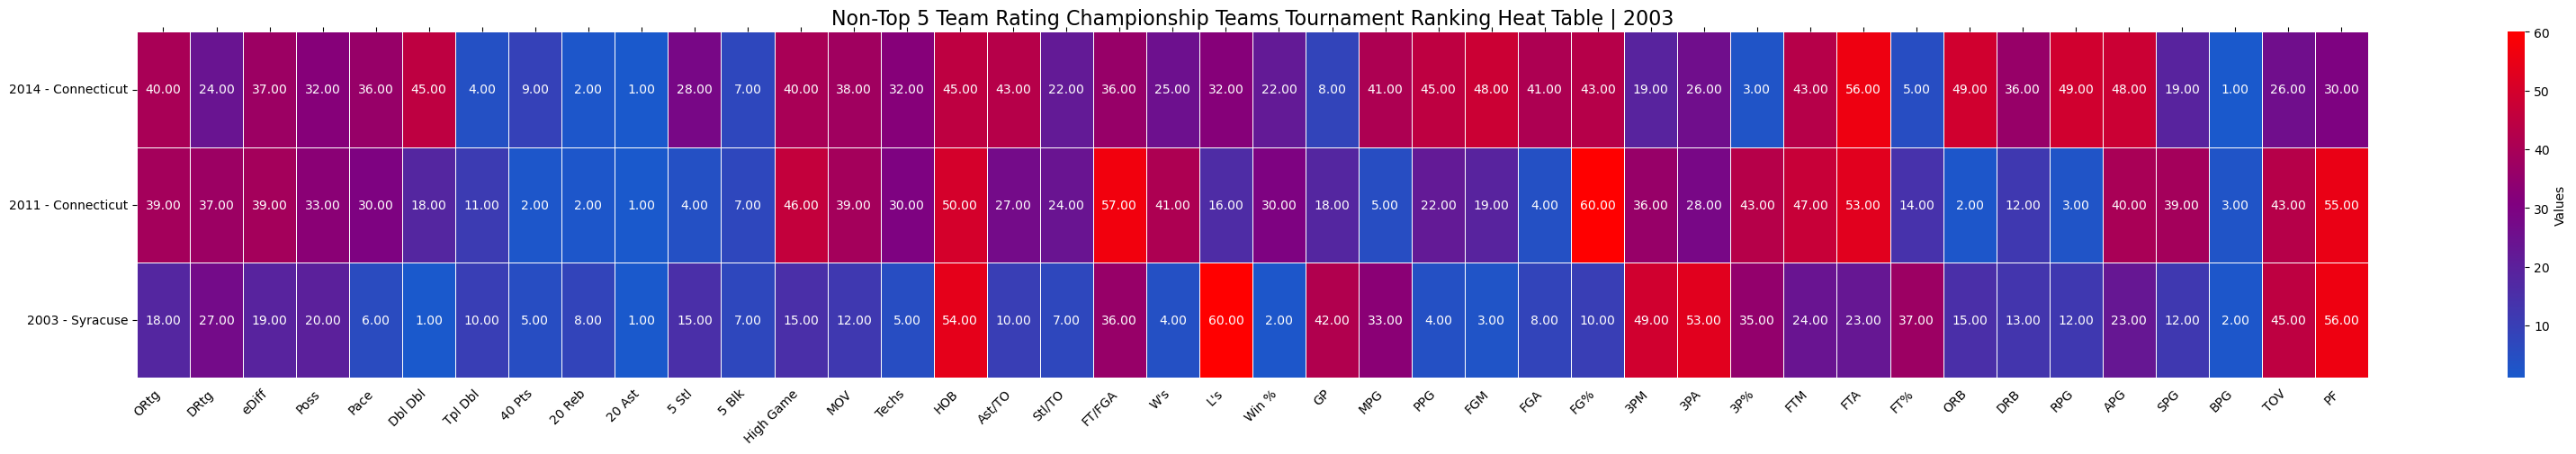

In [28]:
df = pd.read_csv("NCAA Champion LR Data.csv")
#df = pd.read_csv("NCAA Champion RawData.csv")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps

teams_of_interest = ['Syracuse 2003','Connecticut 2011','Connecticut 2014']
champions_only = df[df['Team/Season'].isin(teams_of_interest)].copy()  

numeric_columns = ['ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', 
                   '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                   'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 'PF']


custom_palette = sns.color_palette("pastel", as_cmap=True)

large_color = 'red'
middle_color = 'purple'
small_color = (0.1, 0.35, 0.8)

large_threshold = 1.5
middle_threshold = 0.5

colors = sns.color_palette([small_color, middle_color, large_color], as_cmap=True)
custom_cmap = sns.blend_palette(colors, as_cmap=True)

plt.figure(figsize=(40, 5))
heatmap = sns.heatmap(
    champions_only[numeric_columns],
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    linewidths=.5,
    cbar_kws={'label': 'Values'},
    vmin=champions_only[numeric_columns].min().min(),
    vmax=champions_only[numeric_columns].max().max()
)

championship_teams_labels = ['{} - {}'.format(season, team) for season, team in zip(champions_only['Season'], champions_only['Team'])]
plt.yticks(ticks=[i + 0.5 for i in range(len(championship_teams_labels))], labels=championship_teams_labels, rotation=0)

column_headers = numeric_columns
plt.xticks(ticks=[i + 0.5 for i in range(len(column_headers))], labels=column_headers, rotation=45, ha="right")

plt.tick_params(axis='x', which='both', bottom=False, top=True)

column_averages = champions_only[numeric_columns].mean()
print("Column Averages:")
print(column_averages)

plt.title('Non-Top 5 Team Rating Championship Teams Tournament Ranking Heat Table | 2003', fontsize=16)
plt.savefig("ht_champs_nt5_atr.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ht_champs_nt5_atr.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ht_champs_nt5_atr.png")
plt.show()

Column Averages:
ORtg         109.150000
DRtg          94.350000
eDiff         14.783333
Poss         928.366667
Pace          69.266667
Dbl Dbl        9.000000
Tpl Dbl        0.666667
40 Pts         0.166667
20 Reb         0.166667
20 Ast         0.000000
5 Stl          1.333333
5 Blk          2.166667
High Game     94.000000
MOV           10.500000
Techs          0.833333
HOB            1.530333
Ast/TO         1.183333
Stl/TO         0.600000
FT/FGA         0.259833
W's           10.166667
L's            3.166667
Win %          0.811500
GP            13.333333
MPG           40.383333
PPG           76.333333
FGM           27.200000
FGA           59.666667
FG%            0.454833
3PM            6.550000
3PA           17.700000
3P%            0.369500
FTM           15.416667
FTA           21.066667
FT%            0.732500
ORB           12.350000
DRB           25.183333
RPG           37.533333
APG           14.450000
SPG            7.450000
BPG            6.783333
TOV           12.316667

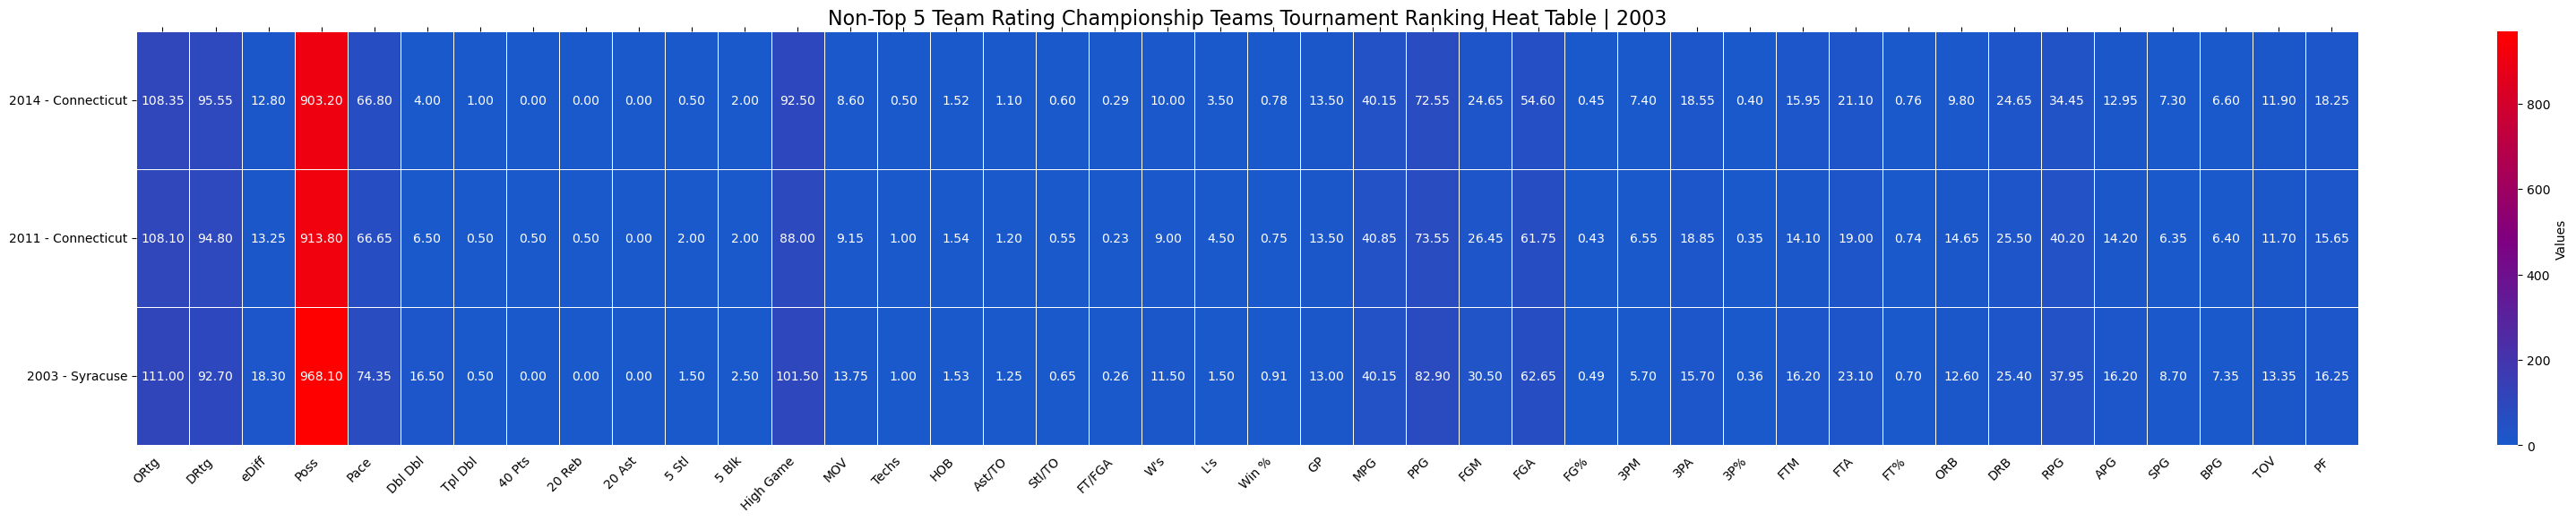

In [30]:
#df = pd.read_csv("NCAA Champion LR Data.csv")
df = pd.read_csv("NCAA Champion RawData.csv")

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image, ImageOps

teams_of_interest = ['Syracuse 2003', 'Connecticut 2011', 'Connecticut 2014']
champions_only = df[df['Team/Season'].isin(teams_of_interest)].copy()  

numeric_columns = ['ORtg', 'DRtg', 'eDiff', 'Poss', 'Pace', 'Dbl Dbl', 'Tpl Dbl', '40 Pts', '20 Reb', '20 Ast', 
                   '5 Stl', '5 Blk', 'High Game', 'MOV', 'Techs', 'HOB', 'Ast/TO', 'Stl/TO', 'FT/FGA', "W's", "L's", 'Win %', 'GP', 'MPG', 'PPG', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
                   'ORB', 'DRB', 'RPG', 'APG', 'SPG', 'BPG', 'TOV', 'PF']


custom_palette = sns.color_palette("pastel", as_cmap=True)

large_color = 'red'
middle_color = 'purple'
small_color = (0.1, 0.35, 0.8)

large_threshold = 1.5
middle_threshold = 0.5

colors = sns.color_palette([small_color, middle_color, large_color], as_cmap=True)
custom_cmap = sns.blend_palette(colors, as_cmap=True)

plt.figure(figsize=(40, 6))
heatmap = sns.heatmap(
    champions_only[numeric_columns],
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    linewidths=.5,
    cbar_kws={'label': 'Values'},
    vmin=champions_only[numeric_columns].min().min(),
    vmax=champions_only[numeric_columns].max().max()
)

championship_teams_labels = ['{} - {}'.format(season, team) for season, team in zip(champions_only['Season'], champions_only['Team'])]
plt.yticks(ticks=[i + 0.5 for i in range(len(championship_teams_labels))], labels=championship_teams_labels, rotation=0)

column_headers = numeric_columns
plt.xticks(ticks=[i + 0.5 for i in range(len(column_headers))], labels=column_headers, rotation=45, ha="right")

plt.tick_params(axis='x', which='both', bottom=False, top=True)

column_averages = champions_only[numeric_columns].mean()
print("Column Averages:")
print(column_averages)

plt.title('Non-Top 5 Team Rating Championship Teams Tournament Ranking Heat Table | 2003', fontsize=16)
plt.savefig("ht_champs_nt5_atr_values.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ht_champs_nt5_atr_values.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ht_champs_nt5_atr_values.png")
plt.show()